# Final Project Submission

Please fill out:
* Student name: Sung Bae
* Student pace: full time
* Scheduled project review date/time: 9/17/2020 7:00 PM
* Instructor name: James Irving
* Blog post URL:


## Importing Various Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# importing my own python file
# %load_ext autoreload
# %autoreload 2
from shb import MakeModel
import shb

In [3]:
# %reload_ext autoreload

# Model #1

## Importing data

In [4]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
len(df.columns)

21

In [5]:
(df['id'].value_counts()>1).sum()
print(df.lat.shape, df.long.shape, df.price.shape)
print(df.lat.isna().sum(), df.long.isna().sum(), df.price.isna().sum())
df.info()

(21597,) (21597,) (21597,)
0 0 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
m

<AxesSubplot:xlabel='long', ylabel='lat'>

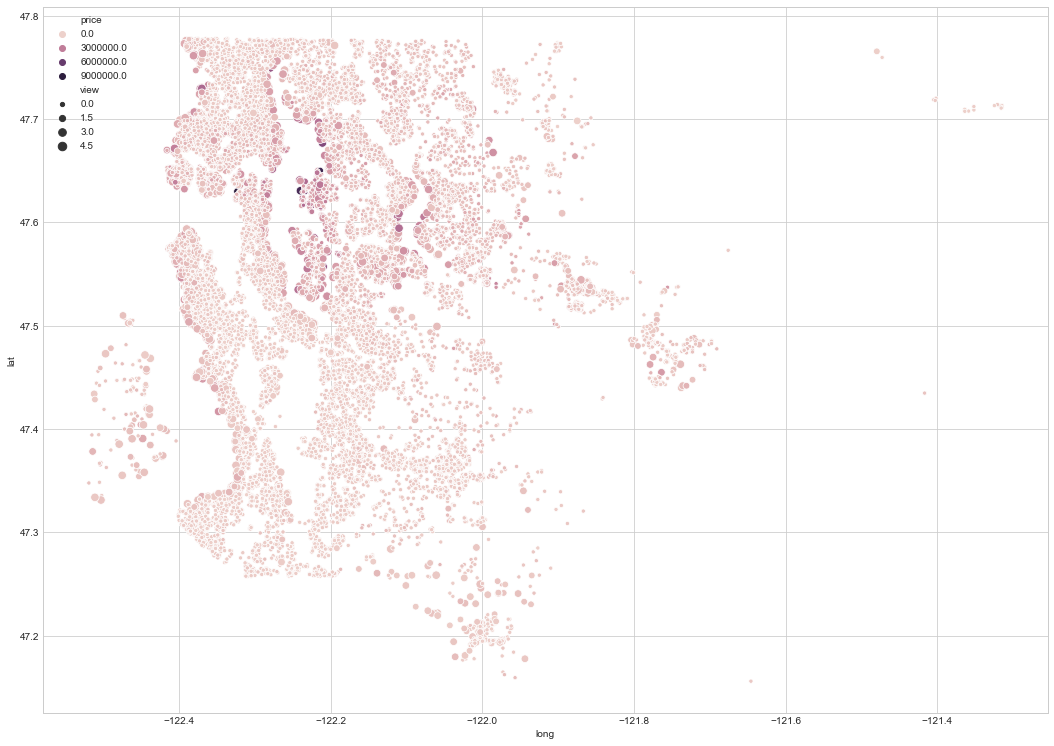

In [6]:
fig, ax = plt.subplots(figsize=(18,13))
sns.scatterplot(x='long', y='lat', size='view', hue='price', data=df)

In [250]:
df['time'] = df['date'].apply(lambda x: round(int(x.split('/')[0])/12,3) + int(x.split('/')[2]))


In [251]:
df.groupby('time').sum()['price'].values

array([9.69158549e+08, 1.21430974e+09, 1.20475657e+09, 1.04057446e+09,
       9.38140350e+08, 1.01198840e+09, 7.36005104e+08, 7.71455856e+08,
       5.14392060e+08, 6.34124504e+08, 1.02010816e+09, 1.25317861e+09,
       3.60592740e+08])

[Text(0.5, 0, 'time (year)'),
 Text(0, 0.5, 'Total Sales ($)'),
 Text(0.5, 1.0, 'Monthly Total House Sales from 2014-2015')]

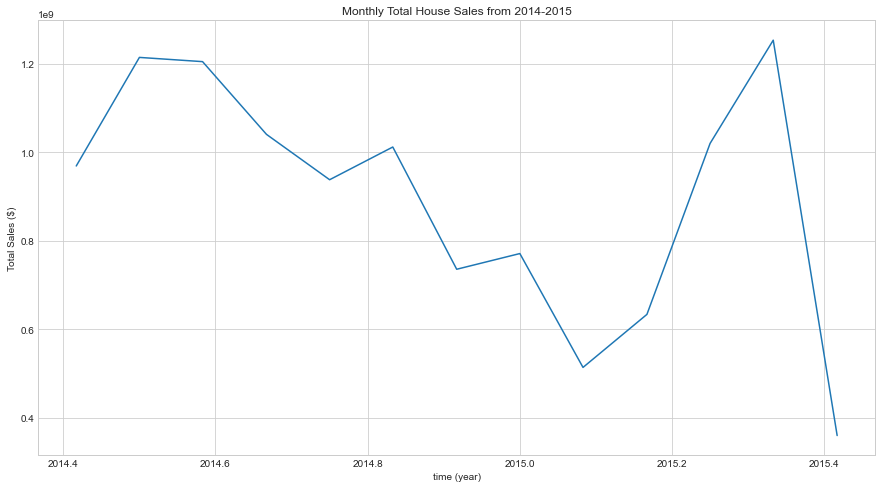

In [252]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x=df.groupby('time').sum()['price'].keys(), 
            y=df.groupby('time').sum()['price'].values, ax=ax)
ax.set(xlabel='time (year)', ylabel='Total Sales ($)', title='Monthly Total House Sales from 2014-2015')

In [249]:
# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# predetermed categorical colums:
cat_cols = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# predetermed continuous colums:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [8]:
# # Determining categorical and continous columns by examining histograms
# cat_cols = []
# cont_cols = []
# for col in df.columns:
#     fig, ax = plt.subplots(figsize=(10,7))
#     try:
#         sns.distplot(df[col], bins='auto', ax=ax)
#         ax.set(title=f'{col}', xlabel=f'{col}', ylabel='frequency')
#         plt.show()
#         user_input = input('Category(0) or continuous(1): ')
#         if user_input=='1':
#             cont_cols.append(col)
#         elif user_input=='0':
#             cat_cols.append(col)
#     except:
#         print(col)

## Scrubbing

In [9]:
# checking for any missing values
df[cont_cols].isna().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> Notice that there aren't any missing values! Yay!

In [10]:
model1 = MakeModel(df)
model1.set_cols(cat=cat_cols, cont=cont_cols)

['date', 'sqft_basement', 'id']
3 columns have been DELETED!
There are now 18 columns in the data.
Model Information
Shape:	(21597, 18)
Perecent Retained:	100
Dropped columns:	['date', 'sqft_basement', 'id']
Categorical columns:	['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']
Contiuous columns:	['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None


## Modeling

In [16]:
model1.split(option='cont')

Shape of X_train: (16197, 8)
Shape of X_test: (5400, 8)
Shape of y_train: (16197,)
Shape of y_test: (5400,)


In [18]:
model1.regression()

Formula:
price ~ sqft_living + sqft_lot + sqft_above + yr_built + lat + long + sqft_living15 + sqft_lot15


In [19]:
model1.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3098.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:51:27   Log-Likelihood:            -2.2297e+05
No. Observations:               16197   AIC:                         4.460e+05
Df Residuals:                   16188   BIC:                         4.460e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.101e+07   1.96e+06    -31.143      0.000   -6.49e+07   -5.72e+07
sqft_living     213.5500      4.490     47.558      0.000     204.749     222.351
sqft_lot          0.1968      0.063      3.101      0.002       0.072       0.321
sqft_above       41.4147      4.946      8.373      0.000      31.719      51.110
yr_built      -1756.6011     72.856    -24.111      0.000   -1899.407   -1613.796
lat            6.128e+05   1.35e+04     45.531      0.000    5.86e+05    6.39e+05
long          -2.876e+05   1.51e+04    -19.047      0.000   -3.17e+05   -2.58e+05
sqft_living15   101.8030      4.265     23.870      0.000      93.443     110.163
sqft_lot15       -0.4923      0.097     -5.064      0.000      -0.683      -0.302
==============================================================================
Omnibus:                    12613.706   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           656403.914
Skew:                           3.303   Prob(JB):                         0.00
Kurtosis:                      33.479   Cond. No.                     5.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.11499720229206366	Train R2 = 0.40697296003816763
Test MSE = 0.1129393451294835	Test R2 = 0.4184830674145358


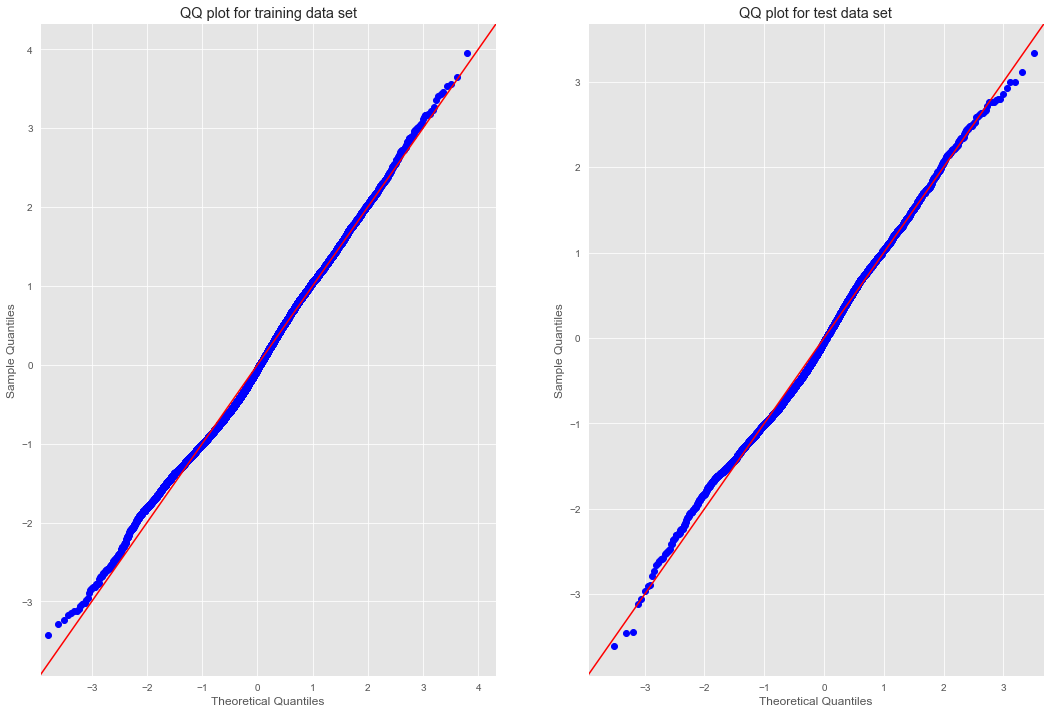

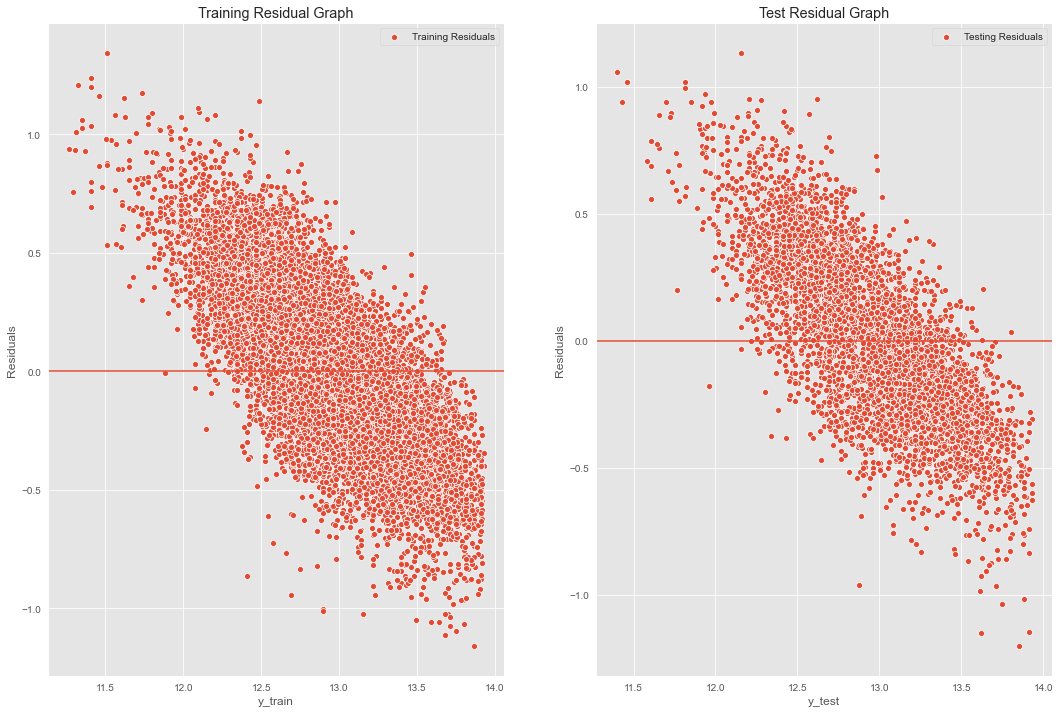

In [83]:
model1.validate_model()

## Intrepret

> Features:
    - Only used continuous data

> Observations:
    - Low r2 values - not a good predictor
    - QQ-plots show normal residuals for both test and train data
    - Homoscedasticity is biased


## Questions

> Questions
    1. What categorical data should I add in order to increase r2 value?
    2. What new features can I add to make the model a better predictor?
    

# Model #2

## Preprocessing Data
In this model, we will include categorical data and we will normalize and filter out outliers in order to make the model better in both accuracy and interpretability.

### Importing Data

In [22]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
# len(df.columns)

In [23]:
# Initialize our second model
model2 = MakeModel(df)

### Dealing with NaN's

In [28]:
model2.count_na()

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


> Changes:
    - waterfront: fillna with 0.
    - yr_renovated: boolean where 1 means renovated and 0 means not renovated. fill na's with 0s.
    - yr_built: make a new column called age = current year - yr_built
    - view: fillna with mode (0.0)

In [30]:
# waterfront: fillnas with 0s. view:fillnas with mode
model2.imuter('waterfront', option=0);
model2.imuter('view', option='mode');


Number of nulls:  0
None
Number of nulls:  0
None


In [31]:
model2.count_na()

yr_renovated     3842
sqft_lot15          0
view                0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


### Creating New Feature - 'age'

In [36]:
# yr_renovated into booleans
model2.data['yr_renovated'] = model2.data['yr_renovated']>1000

In [37]:
# Create a new column 'age' and drop 'yr_built'
model2.data['age'] = 2019 - model2.data['yr_built']
model2.data.drop(columns='yr_built', axis=1, inplace=True)

In [88]:
model2.data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

### Checking for Linearity and classifying columns into catergorical / continuous

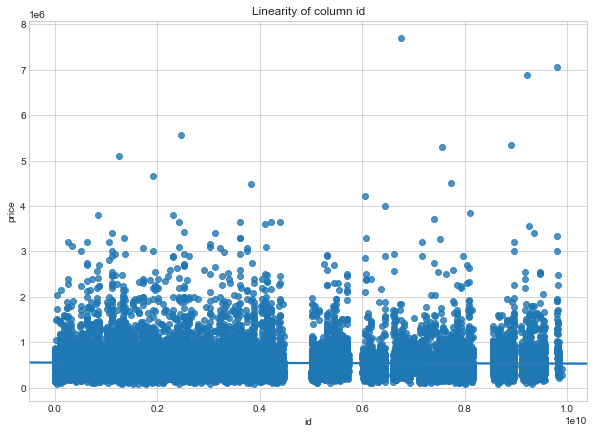


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'id' has been DELETED!
There are now 21 columns in the data.
date


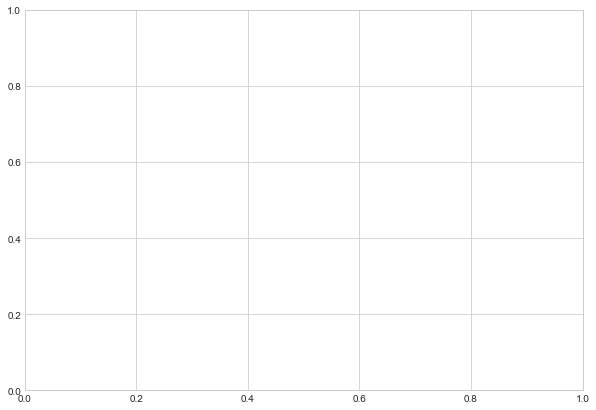

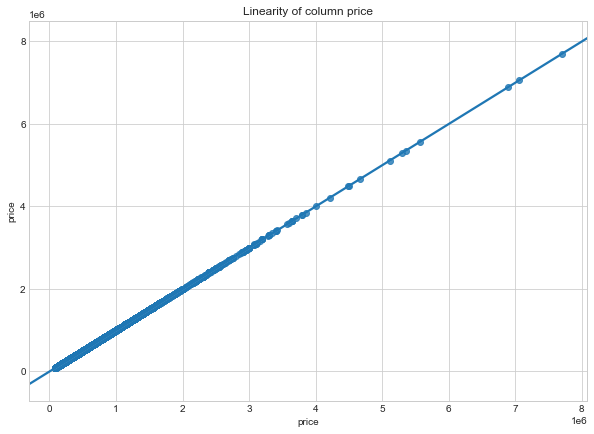


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'price' has been added to continuous columns!'


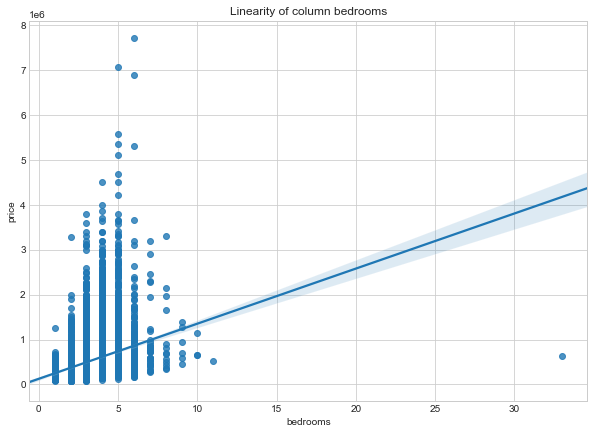


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'bedrooms' has been added to continuous columns!'


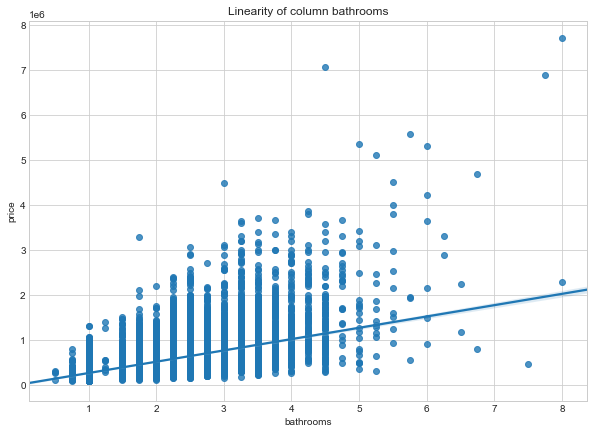


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'bathrooms' has been added to continuous columns!'


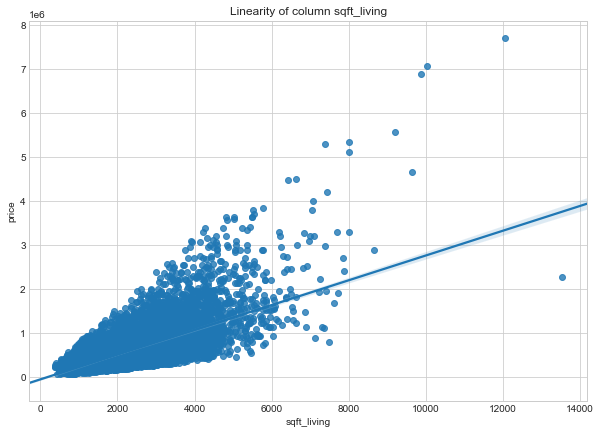


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_living' has been added to continuous columns!'


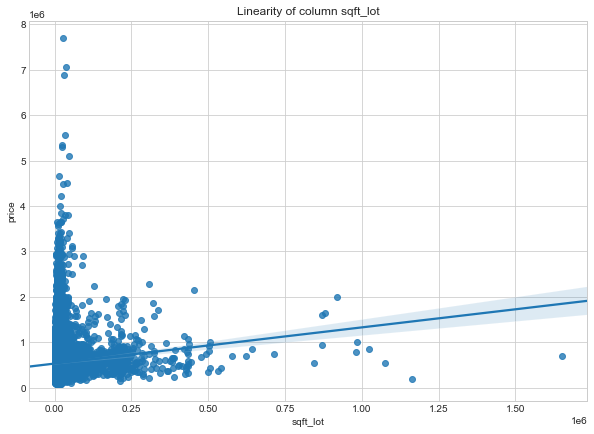


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_lot' has been DELETED!
There are now 21 columns in the data.


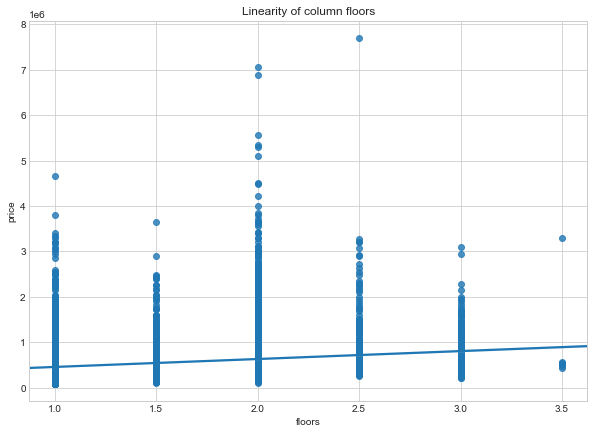


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'floors' has been DELETED!
There are now 21 columns in the data.


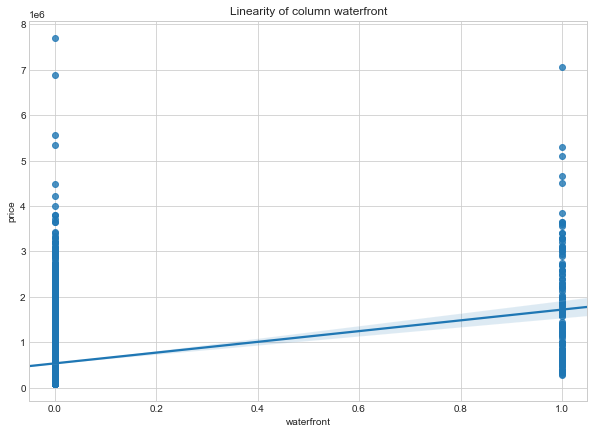


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'waterfront' has been added to categorical columns!'


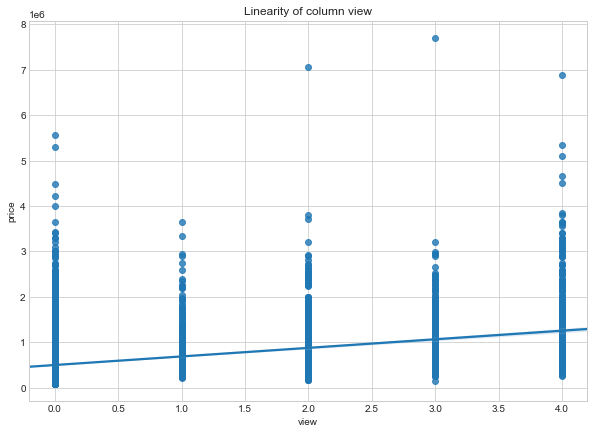


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'view' has been added to categorical columns!'


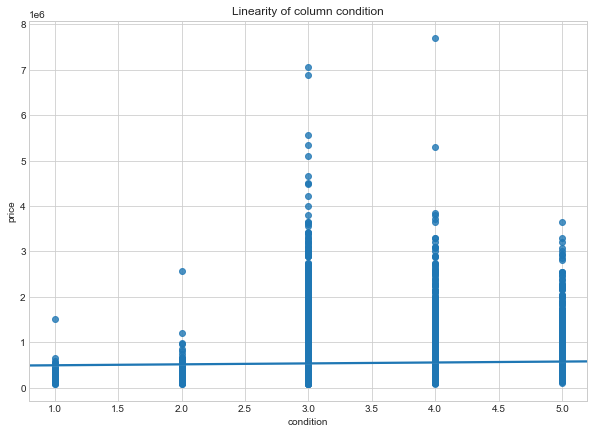


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'condition' has been added to categorical columns!'


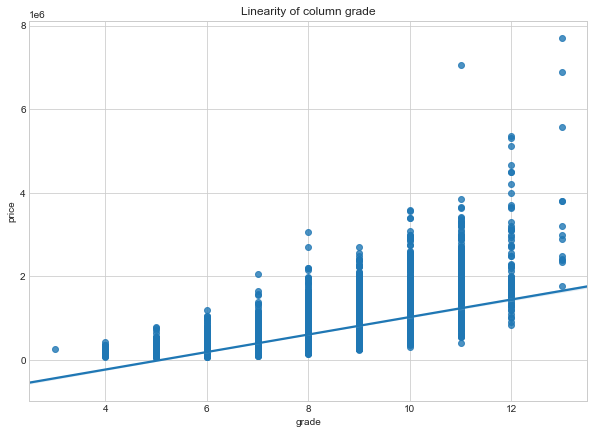


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'grade' has been added to categorical columns!'


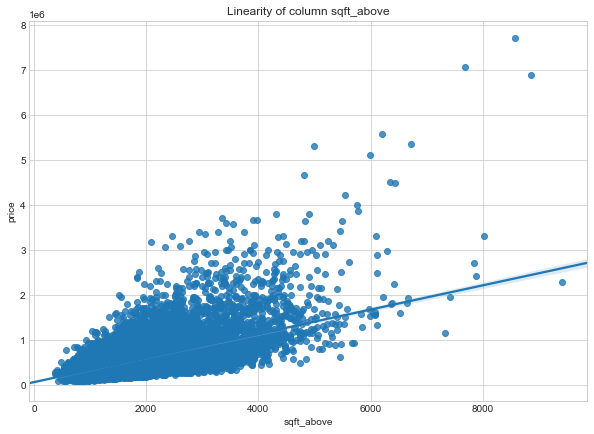


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_above' has been added to continuous columns!'
sqft_basement


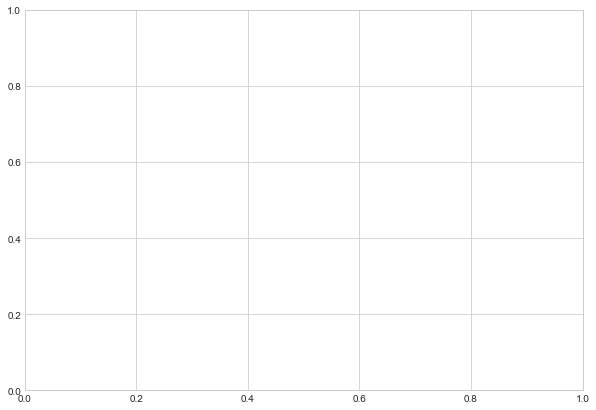

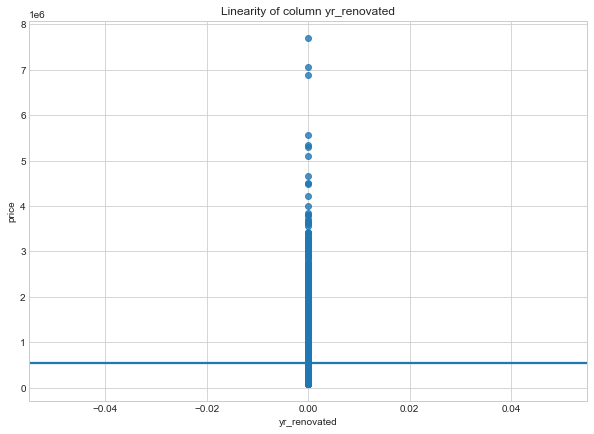


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'yr_renovated' has been DELETED!
There are now 21 columns in the data.


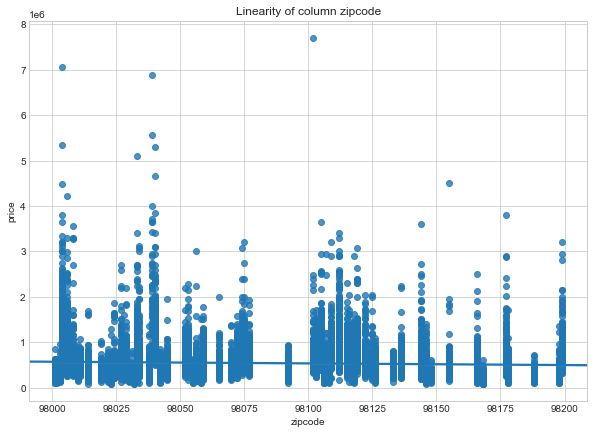


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'zipcode' has been DELETED!
There are now 21 columns in the data.


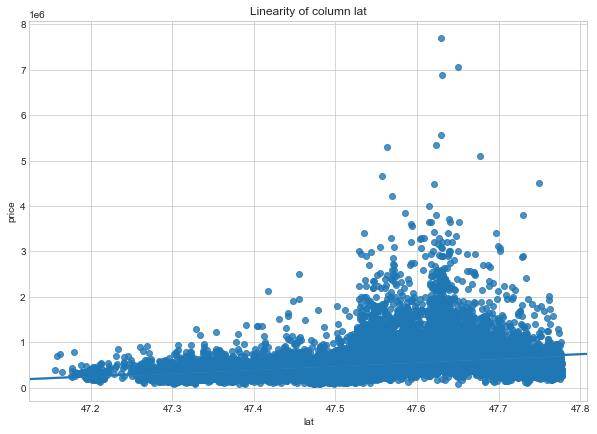


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'lat' has been added to continuous columns!'


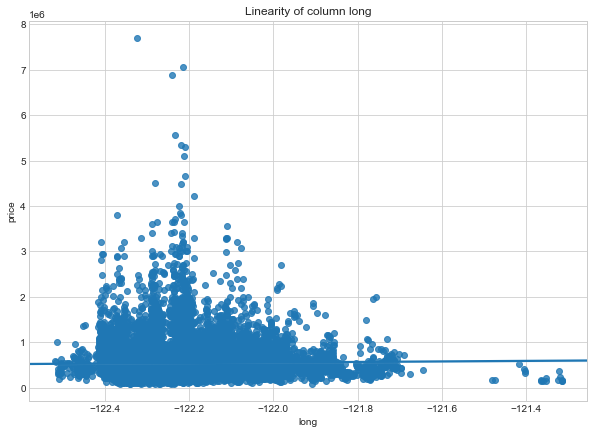


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'long' has been added to continuous columns!'


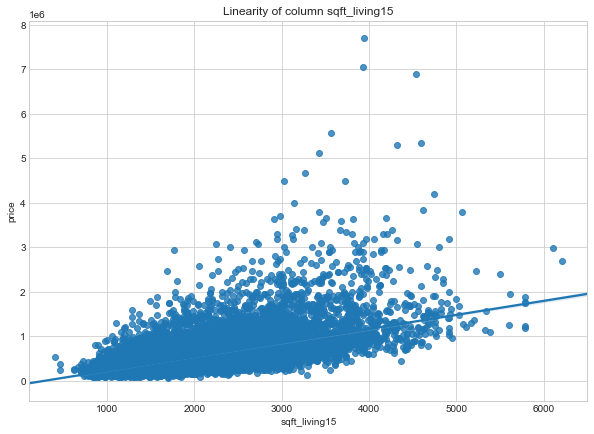


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_living15' has been added to continuous columns!'


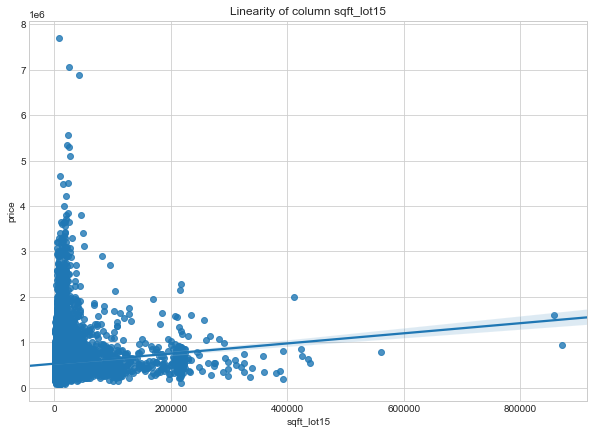


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_lot15' has been added to continuous columns!'


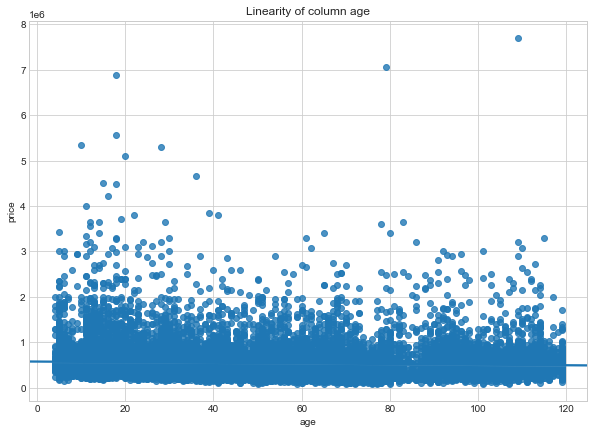


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'age' has been added to continuous columns!'


In [38]:
# Categorize each col into either categorical, continous or just drop
# Also check for linearity between each variable vs. price (target)
model2.col_classifier()

In [39]:
print(model2)

Model Information
Shape:	(21597, 21)
Perecent Retained:	100
Dropped columns:	['id', 'sqft_lot', 'floors', 'yr_renovated', 'zipcode']
Categorical columns:	['waterfront', 'view', 'condition', 'grade']
Contiuous columns:	['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


### Identifying possible multicolinear variables


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 1


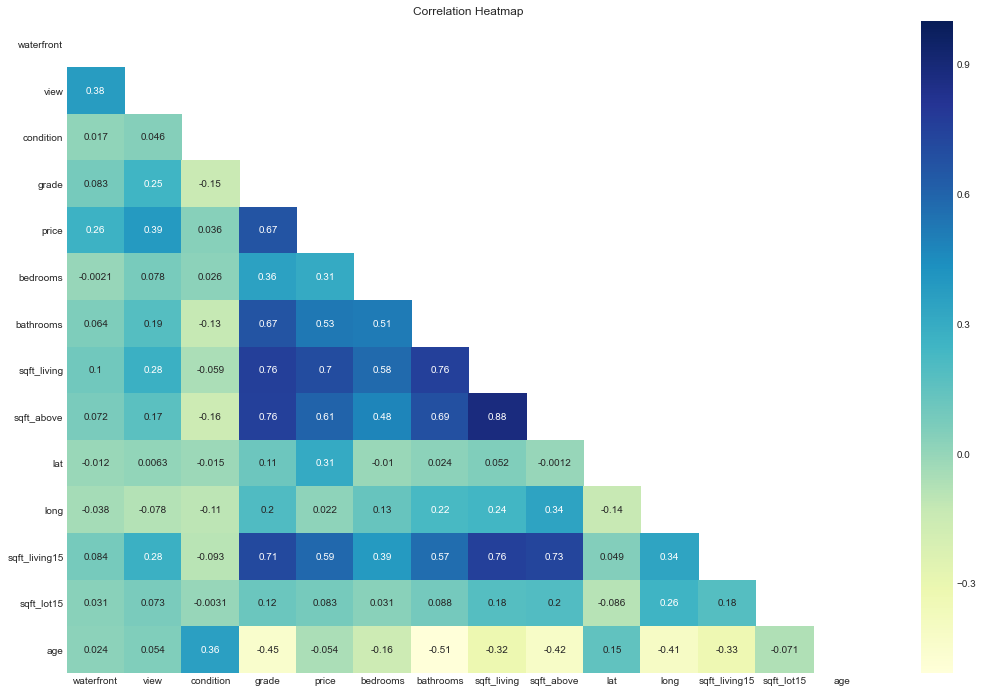

sqft_living  sqft_above       0.876448
grade        sqft_living      0.762779
sqft_living  sqft_living15    0.756402
grade        sqft_above       0.756073
bathrooms    sqft_living      0.755758
sqft_above   sqft_living15    0.731767
grade        sqft_living15    0.713867
price        sqft_living      0.701917
bathrooms    sqft_above       0.686668
grade        price            0.667951
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): sqft_above
'sqft_above' has been DELETED!
There are now 21 columns in the data.


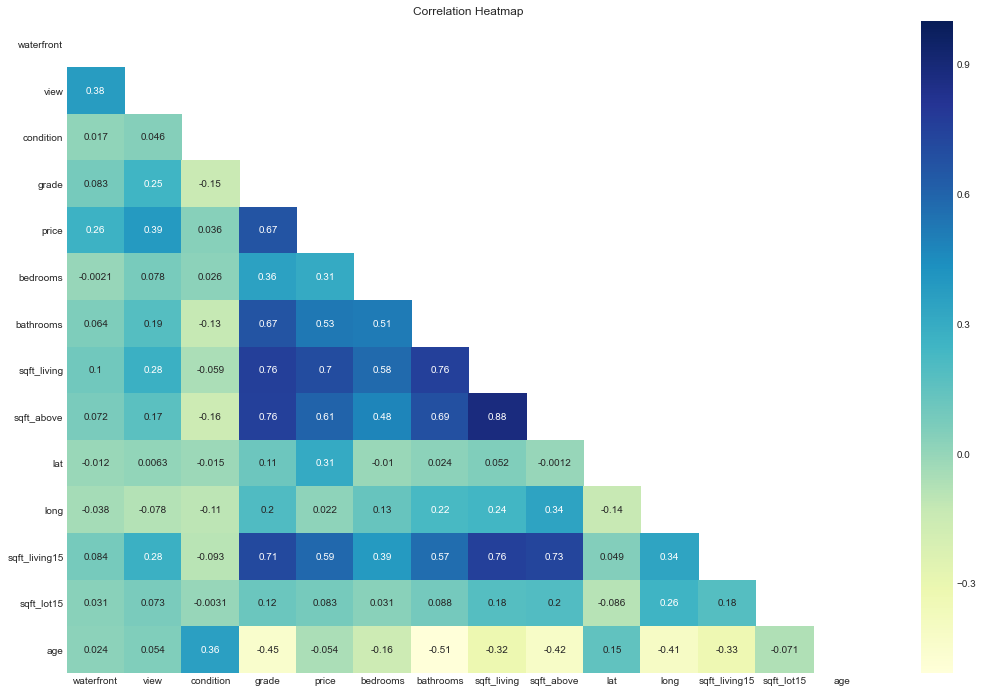

sqft_living  sqft_above       0.876448
grade        sqft_living      0.762779
sqft_living  sqft_living15    0.756402
grade        sqft_above       0.756073
bathrooms    sqft_living      0.755758
sqft_above   sqft_living15    0.731767
grade        sqft_living15    0.713867
price        sqft_living      0.701917
bathrooms    sqft_above       0.686668
grade        price            0.667951
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): sqft_living15
'sqft_living15' has been DELETED!
There are now 21 columns in the data.


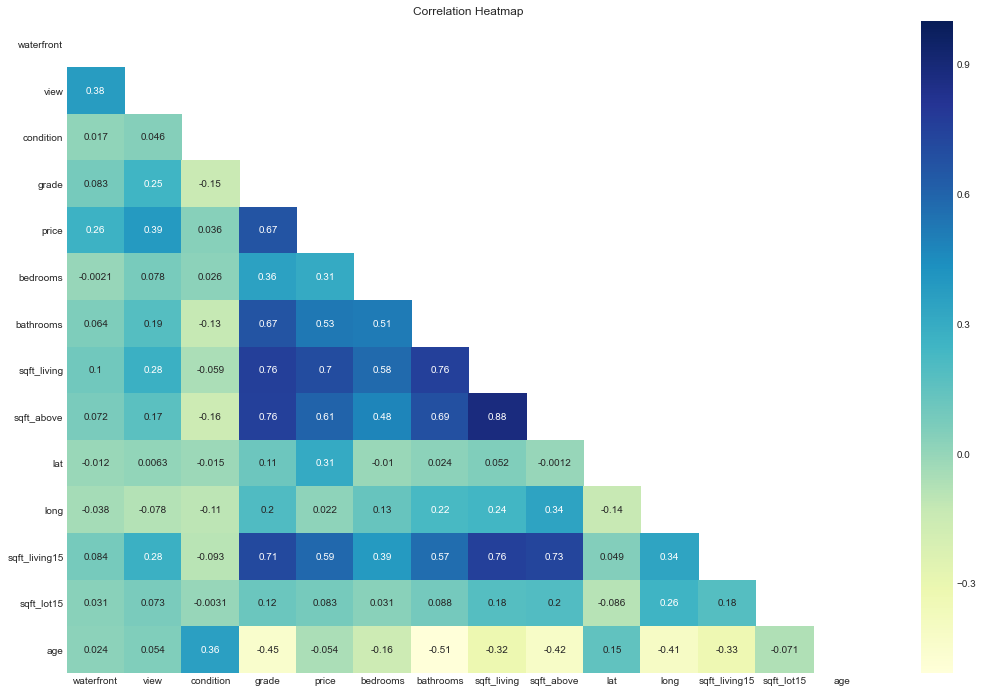

sqft_living  sqft_above       0.876448
grade        sqft_living      0.762779
sqft_living  sqft_living15    0.756402
grade        sqft_above       0.756073
bathrooms    sqft_living      0.755758
sqft_above   sqft_living15    0.731767
grade        sqft_living15    0.713867
price        sqft_living      0.701917
bathrooms    sqft_above       0.686668
grade        price            0.667951
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): x
Exiting!
There are 21 columns remaining in the data


In [40]:
model2.multicolinearity()
# model2.cont_cols

In [41]:
print(model2)

Model Information
Shape:	(21597, 21)
Perecent Retained:	100
Dropped columns:	['id', 'sqft_lot', 'floors', 'yr_renovated', 'zipcode', 'sqft_above', 'sqft_living15']
Categorical columns:	['waterfront', 'view', 'condition', 'grade']
Contiuous columns:	['price', 'bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long', 'sqft_lot15', 'age']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


### Checking for Normality - Scaling Data

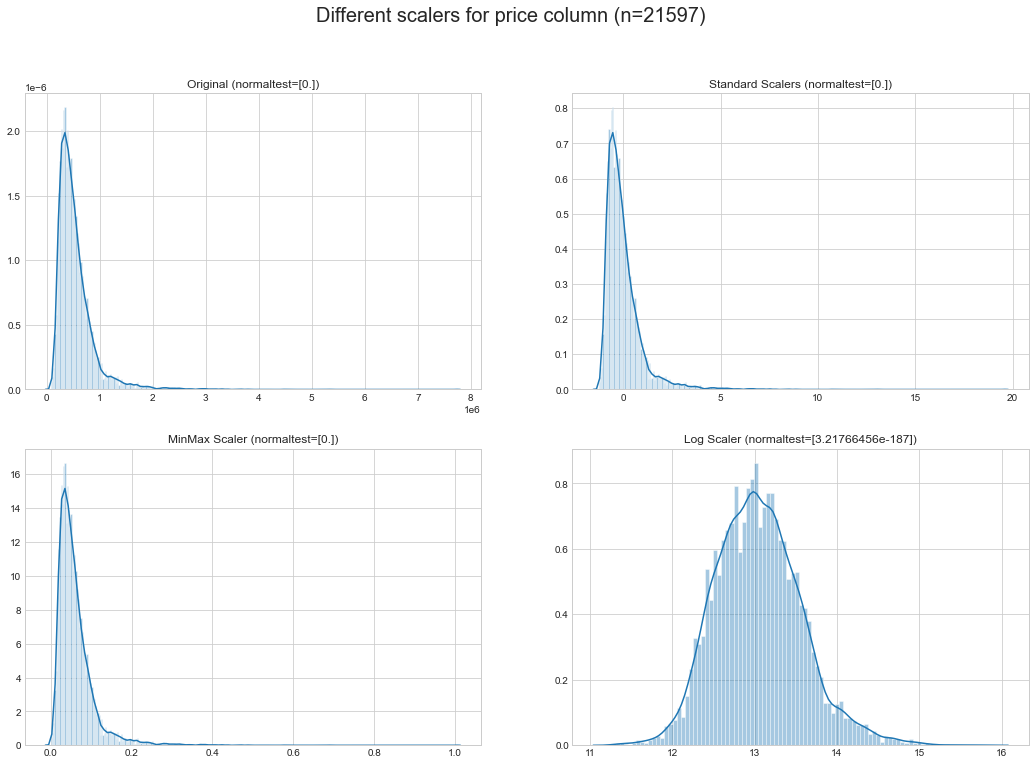

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


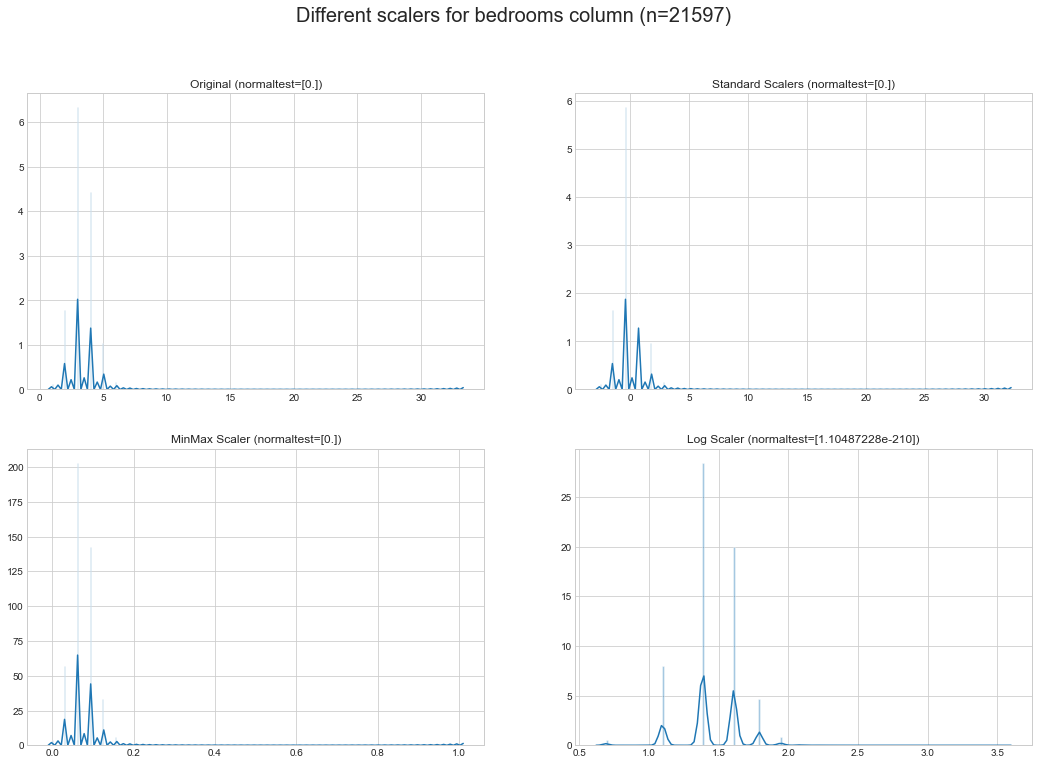

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


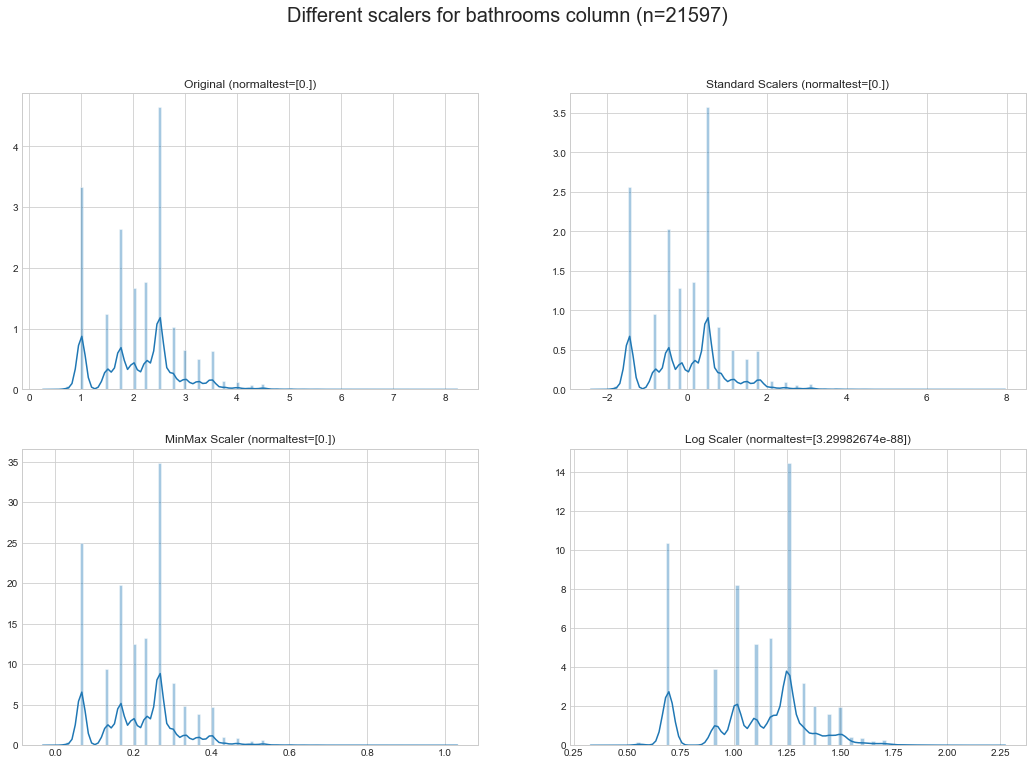

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


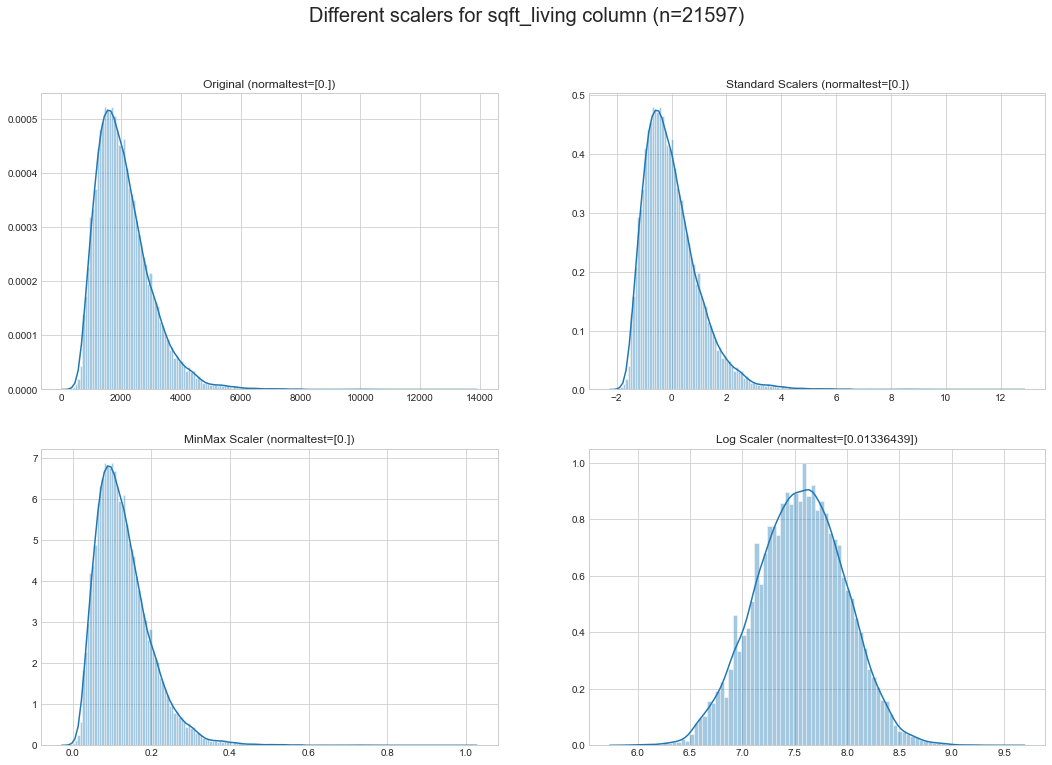

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


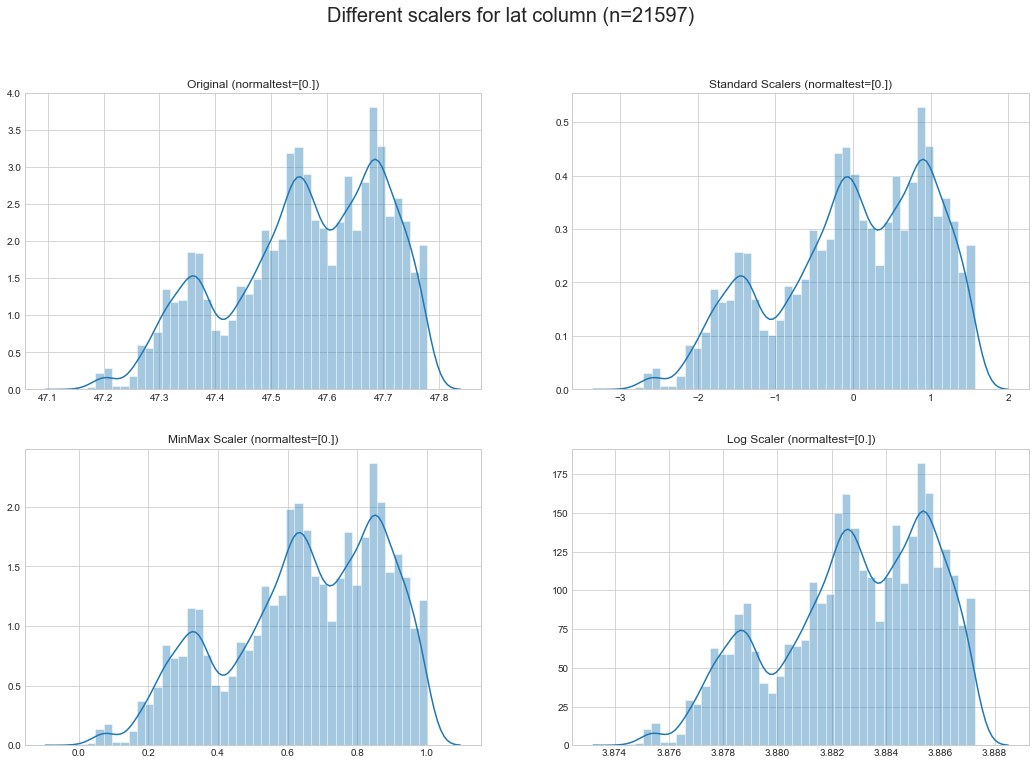

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2
Error occured


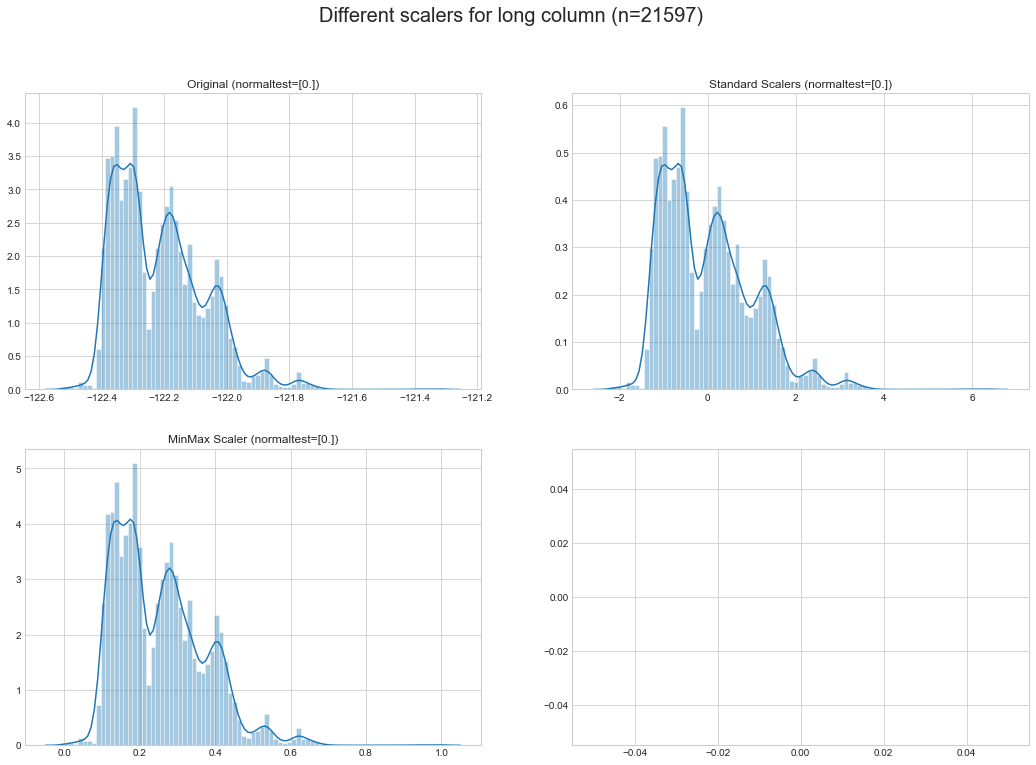

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


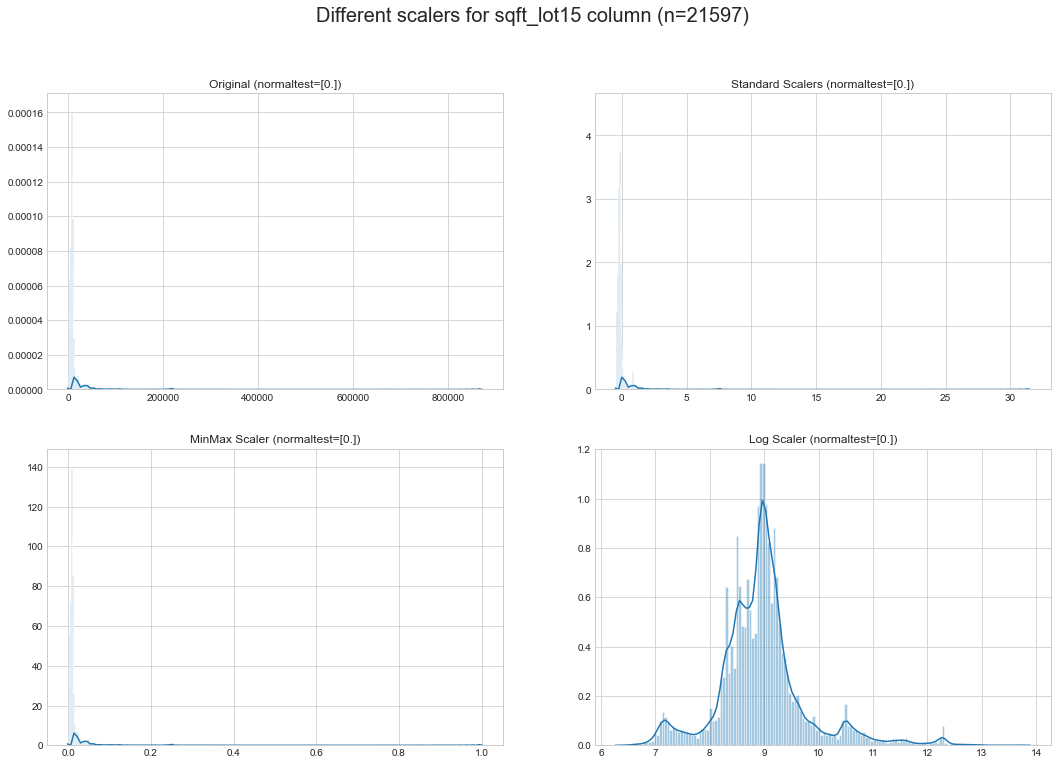

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


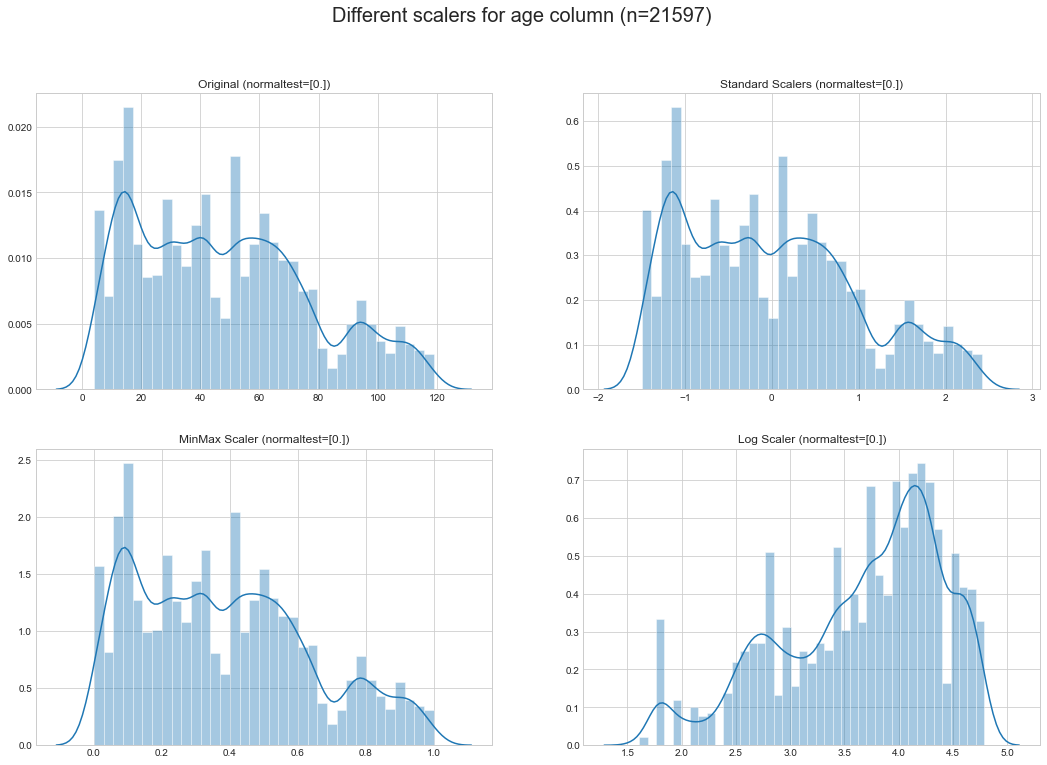

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


In [42]:
# Goes through each remaining continuous columns to scale the data to make them "more" normal.
for col in model2.cont_cols:
    model2.scaler(col)

In [43]:
# the following shows different scalers used for different columns
model2.transformers

{'price': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'bedrooms': StandardScaler(copy=True, with_mean=True, with_std=True),
 'bathrooms': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_living': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'lat': StandardScaler(copy=True, with_mean=True, with_std=True),
 'long': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_lot15': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'age': StandardScaler(copy=True, with_mean=

### Filtering Out Unwanted Outliers

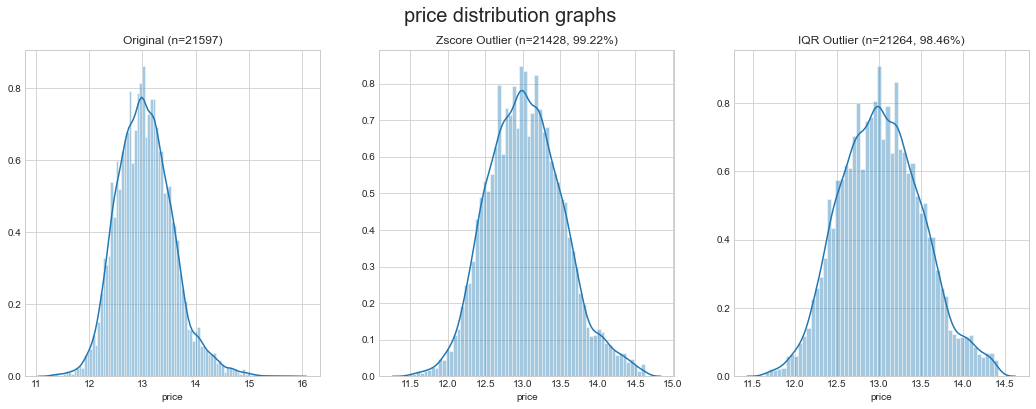

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


333 number of data have been removed by this process.

So far we have 98.458% of original data.


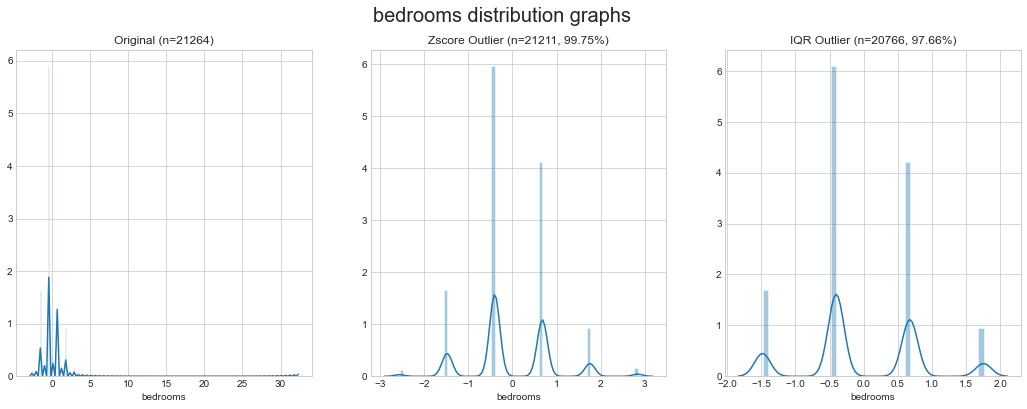

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


498 number of data have been removed by this process.

So far we have 96.152% of original data.


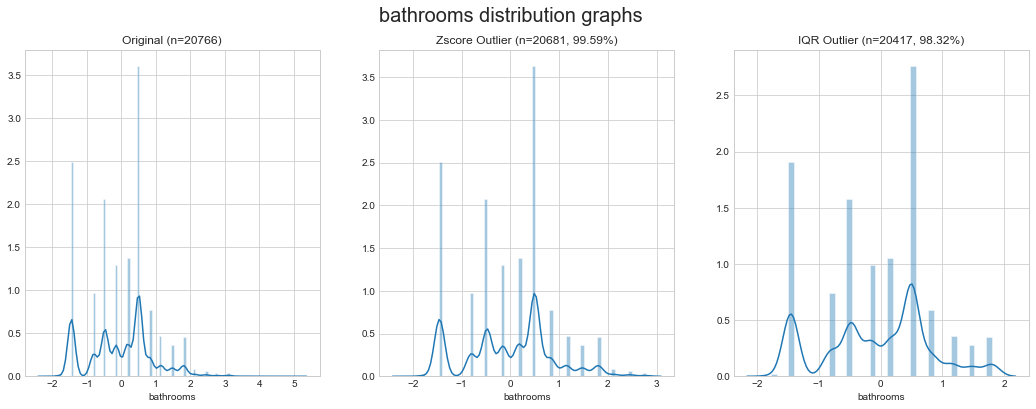

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


349 number of data have been removed by this process.

So far we have 94.536% of original data.


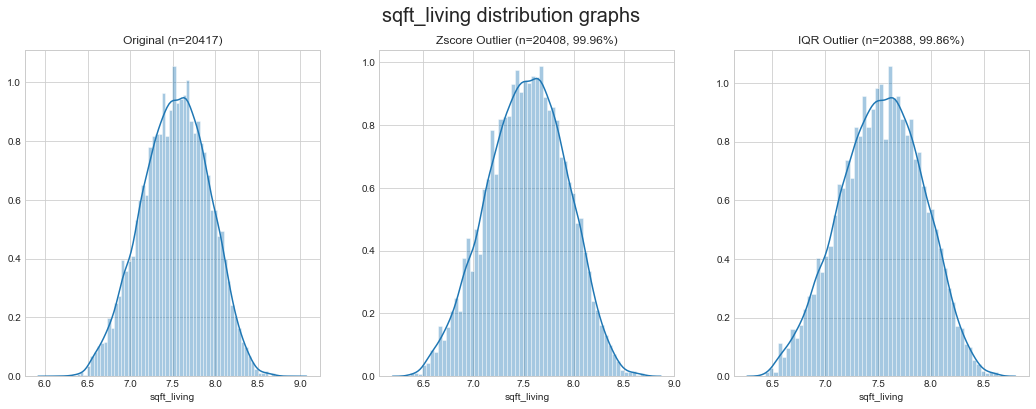

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


29 number of data have been removed by this process.

So far we have 94.402% of original data.


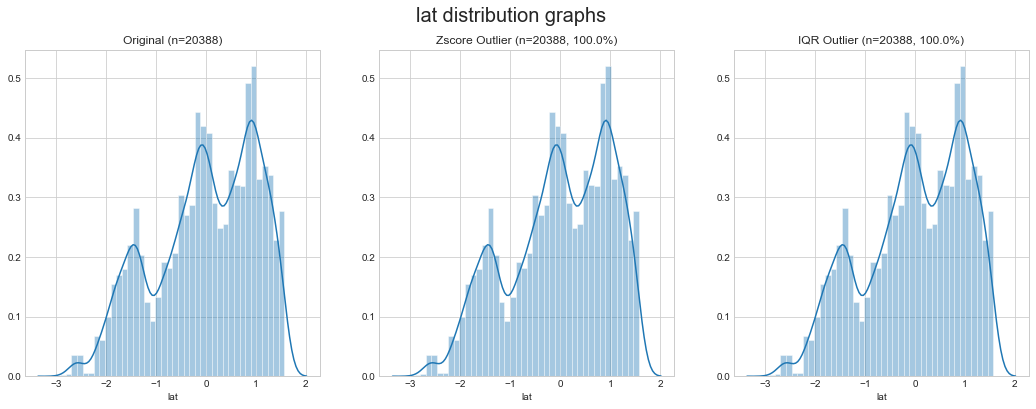

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


0 number of data have been removed by this process.

So far we have 94.402% of original data.


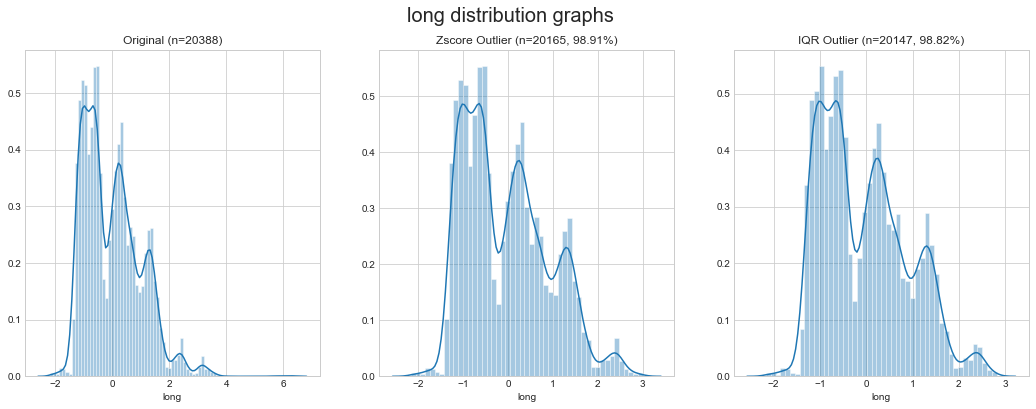

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


241 number of data have been removed by this process.

So far we have 93.286% of original data.


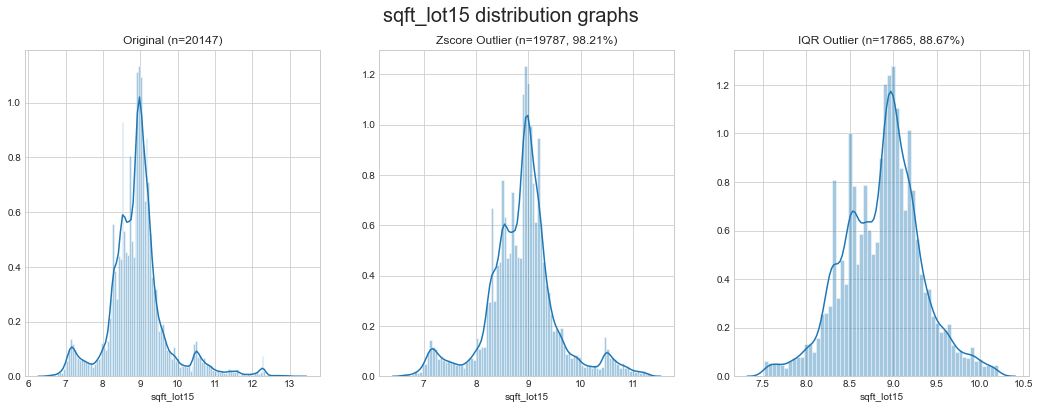

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


2282 number of data have been removed by this process.

So far we have 82.72% of original data.


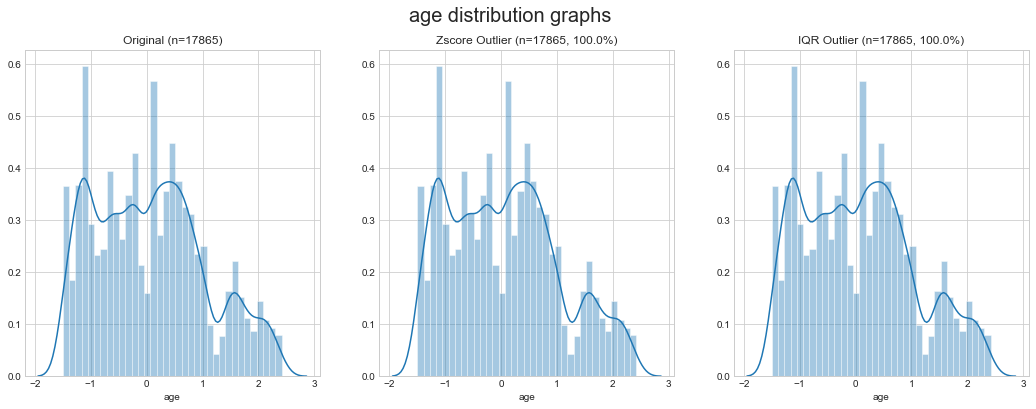

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


In [44]:
for col in model2.cont_cols:
    model2.outlier(col)

## Making a Model

### Splitting Data

In [45]:
# Set X,y and split data
model2.split()

Shape of X_train: (13398, 7)
Shape of X_test: (4467, 7)
Shape of y_train: (13398,)
Shape of y_test: (4467,)


### OLS

In [46]:
model_2 = model2.regression()
model_2.summary()

Formula:
price ~ bedrooms + bathrooms + sqft_living + lat + long + sqft_lot15 + age


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3512.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:07:56   Log-Likelihood:                -2357.4
No. Observations:               13398   AIC:                             4731.
Df Residuals:                   13390   BIC:                             4791.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4075      0.089     82.782      0.000       7.232       7.583
bedrooms       -0.0629      0.004    -16.811      0.000      -0.070      -0.056
bathrooms       0.0832      0.005     16.957      0.000       0.074       0.093
sqft_living     0.8055      0.011     71.850      0.000       0.784       0.827
lat             0.2104      0.003     81.985      0.000       0.205       0.215
long            0.0069      0.003      2.109      0.035       0.000       0.013
sqft_lot15     -0.0515      0.006     -8.755      0.000      -0.063      -0.040
age             0.0939      0.003     27.331      0.000       0.087       0.101
==============================================================================
Omnibus:                      163.610   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.203
Skew:                           0.153   Prob(JB):                     3.78e-51
Kurtosis:                       3.568   Cond. No.                         422.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Observations
    - r_2_score = 0.647 is an 'okay' value that can be used for interpretation of the model.
    - Not so hot in predicting outcomes
    - Biggest affectors:
        - sqft_living - more space more price
        - Intercept - tells us that houeses are just expensive
        - Latitude - seems like high land value areas are somewhat dependant on latitude
    - Negative affectors:
        - sqft_lot : seems like having a big lot isn't a good thing after all according to this model
        

### Model Vadliation

Train MSE = 0.08324408411811837	Train R2 = 0.6474103914595521
Test MSE = 0.08302960705730707	Test R2 = 0.6364824083924583


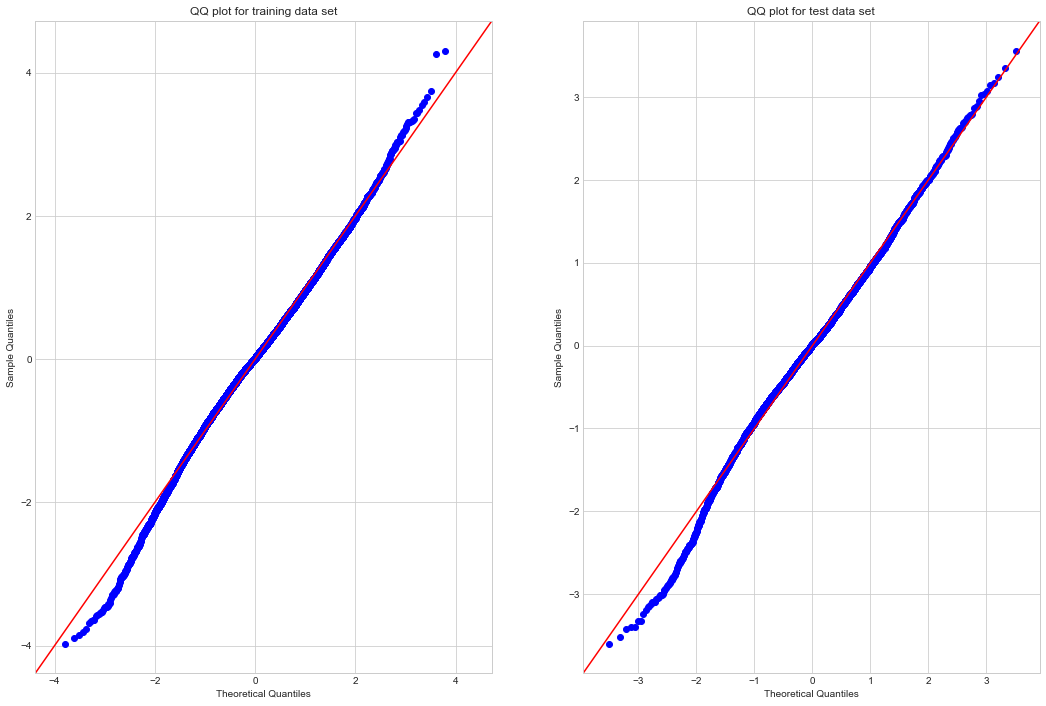

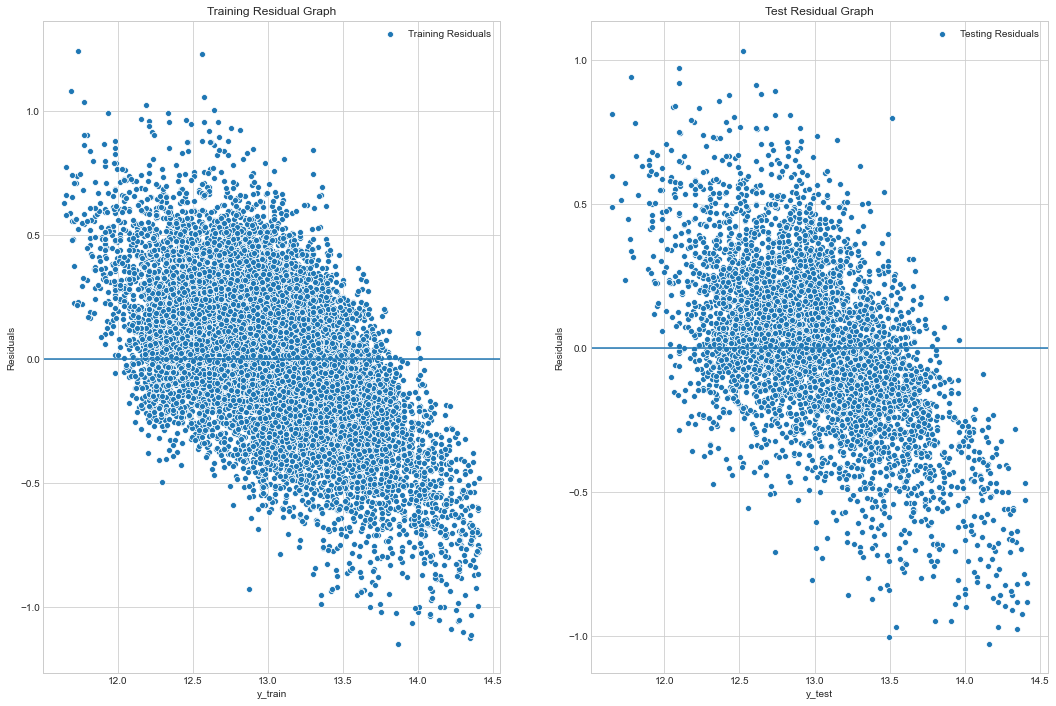

In [47]:
model2.validate_model()

> Observations
    - QQ-plots:
        - Both training and test results show relatively normal distribution of residuals.
    - Homoscedasticity
        - negative association with relatively uniform width tells us that the model is
            (1) biased - overestimates lower priced houses and underestimates higher priced houses.
            (2) homoscedastic
    - MSE and r2 scores
        - The values of MSE and r2 scores are relatively same for both train and test data. 
        - So our model has a good fit!

## Adding OHE
Now we will add categorical data and see how our model changes

In [48]:
model2.ohe()

*** OHE TIME ***
Column Name: waterfront
Number of unique values: 2
0.0    0.996586
1.0    0.003414
Name: waterfront, dtype: float64
Would you like to ohe column 'waterfront' (1-yes, 2-no, x-exit): 1
Column waterfront has been one-hot-encoded
1 columns have been added.
Total number of columns: 22
Column Name: view
Number of unique values: 5
0.0    0.910999
2.0    0.042653
3.0    0.020039
1.0    0.016345
4.0    0.009964
Name: view, dtype: float64
Would you like to ohe column 'view' (1-yes, 2-no, x-exit): 1
Column view has been one-hot-encoded
4 columns have been added.
Total number of columns: 26
Column Name: condition
Number of unique values: 5
3    0.630675
4    0.276015
5    0.085195
2    0.006997
1    0.001120
Name: condition, dtype: float64
Would you like to ohe column 'condition' (1-yes, 2-no, x-exit): 1
Column condition has been one-hot-encoded
4 columns have been added.
Total number of columns: 30
Column Name: grade
Number of unique values: 10
7     0.450266
8     0.273776
9    

In [49]:
# Fixes column names so that they can be used in OLS formula
model2.fix_col_names()

In [50]:
model2.split()

Shape of X_train: (13398, 25)
Shape of X_test: (4467, 25)
Shape of y_train: (13398,)
Shape of y_test: (4467,)


In [51]:
model2.regression()

Formula:
price ~ bedrooms + bathrooms + sqft_living + lat + long + sqft_lot15 + age + waterfront_10 + view_10 + view_20 + view_30 + view_40 + condition_2 + condition_3 + condition_4 + condition_5 + grade_5 + grade_6 + grade_7 + grade_8 + grade_9 + grade_10 + grade_11 + grade_12 + grade_13


In [14]:
model2.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     802.0
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:20:02   Log-Likelihood:                -965.06
No. Observations:               13243   AIC:                             1992.
Df Residuals:                   13212   BIC:                             2224.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.4448      0.100     74.209      0.000       7.248       7.641
sqft_lot             -0.1663      0.014    -11.592      0.000      -0.194      -0.138
sqft_living           0.7037      0.009     75.389      0.000       0.685       0.722
age                   0.2146      0.014     15.012      0.000       0.187       0.243
lat                   0.2158      0.002     90.401      0.000       0.211       0.221
long                  0.0195      0.003      7.144      0.000       0.014       0.025
bedrooms_2           -0.0503      0.025     -2.028      0.043      -0.099      -0.002
bedrooms_3           -0.1230      0.025     -4.945      0.000      -0.172      -0.074
bedrooms_4           -0.1476      0.026     -5.740      0.000      -0.198      -0.097
bedrooms_5           -0.2030      0.027     -7.426      0.000      -0.257      -0.149
bedrooms_6           -0.2619      0.035     -7.570      0.000      -0.330      -0.194
bedrooms_7           -0.3640      0.067     -5.450      0.000      -0.495      -0.233
bedrooms_8           -0.3436      0.153     -2.250      0.024      -0.643      -0.044
bedrooms_9           -0.1833      0.186     -0.984      0.325      -0.549       0.182
bedrooms_10       -6.052e-16   2.11e-16     -2.863      0.004   -1.02e-15   -1.91e-16
bedrooms_11          -0.4641      0.262     -1.770      0.077      -0.978       0.050
bedrooms_33           0.1041      0.262      0.398      0.691      -0.409       0.617
floors_15             0.0476      0.009      5.277      0.000       0.030       0.065
floors_20             0.1134      0.007     16.676      0.000       0.100       0.127
floors_25             0.1821      0.033      5.579      0.000       0.118       0.246
floors_30             0.1647      0.015     10.932      0.000       0.135       0.194
floors_35             0.2138      0.117      1.829      0.067      -0.015       0.443
waterfront_10         0.3298      0.070      4.682      0.000       0.192       0.468
view_10               0.1850      0.019      9.491      0.000       0.147       0.223
view_20               0.2017      0.012     16.214      0.000       0.177       0.226
view_30               0.2318      0.020     11.542      0.000       0.192       0.271
view_40               0.3992      0.034     11.679      0.000       0.332       0.466
condition_2           0.1709      0.080      2.131      0.033       0.014       0.328
condition_3           0.2623      0.076      3.465      0.001       0.114       0.411
condition_4           0.3198      0.076      4.224      0.000       0.171       0.468
condition_5           0.3620      0.076      4.764      0.000       0.213       0.511
yr_renovated_True     0.0593      0.014      4.300      0.000       0.032       0.086
=========================================================================

> Observations
    - r_2_score = 0.646 is an 'okay' value that can be used for interpretation of the model.
    - Not so hot in predicting outcomes
    - Biggest affectors:
        - sqft_living - more space more price
        - Intercept - tells us that houeses are just expensive
        - Latitude - seems like high land value areas are somewhat dependant on latitude
    - Negative affectors:
        - sqft_lot : seems like having a big lot isn't a good thing after all according to this model

Train MSE = 0.05950142343009895	Train R2 = 0.7479750805468741
Test MSE = 0.05850683584737149	Test R2 = 0.7438472273494573


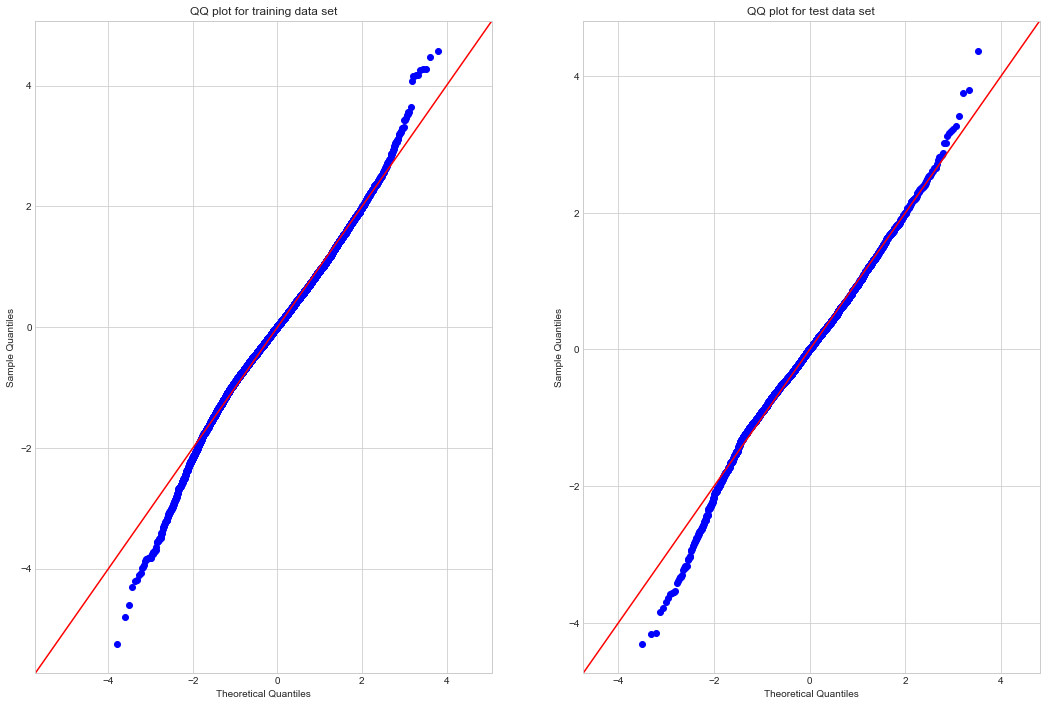

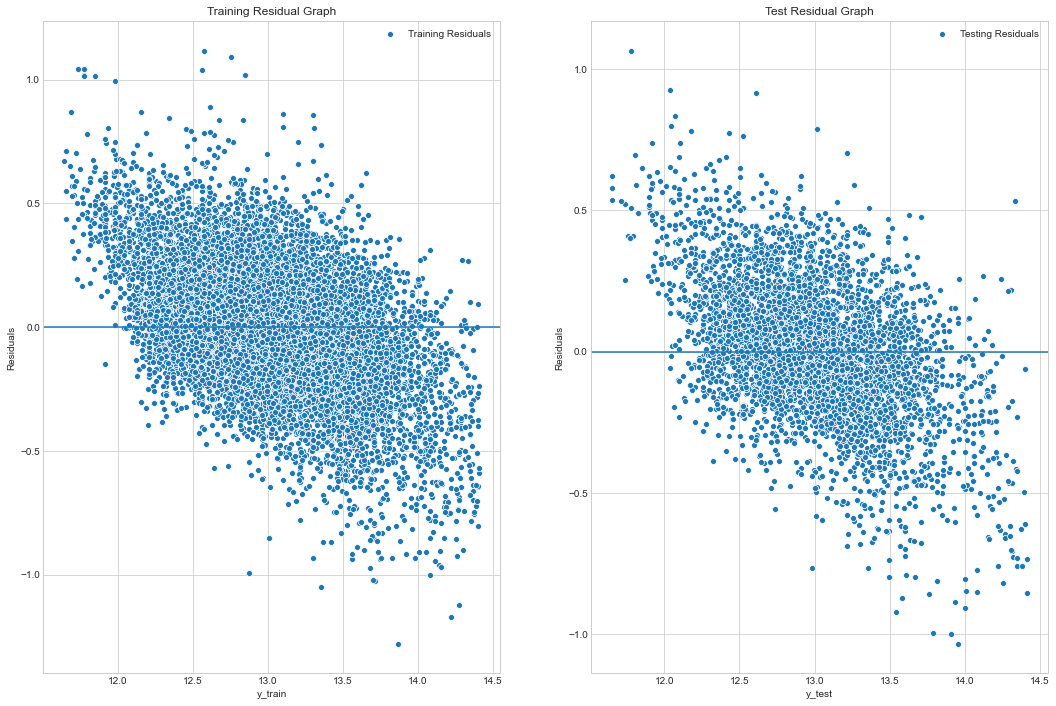

In [52]:
model2.validate_model()

> Observations
    - QQ-plots:
        - Both training and test results show relatively normal distribution of residuals.
    - Homoscedasticity
        - negative association with relatively uniform width tells us that the model is
            (1) biased - overestimates lower priced houses and underestimates higher priced houses.
            (2) homoscedastic
    - MSE and r2 scores
        - The values of MSE and r2 scores are relatively same for both train and test data. 
        - So our model has a good fit!

## Question

> Questions
    3. Will getting rid of more columns help in making the model "better" using VIF and p-values?

In [6]:
# Quick Save
# shb.save_data(model2, name='model2_after_ohe')
model2 = shb.load_data(name='model2_after_ohe')

In [7]:
print(model2)

Model Information
Shape:	(17865, 39)
Perecent Retained:	82.72
Dropped columns:	['id', 'sqft_lot', 'floors', 'yr_renovated', 'zipcode', 'sqft_above', 'sqft_living15']
Categorical columns:	['waterfront', 'view', 'condition', 'grade']
Contiuous columns:	['price', 'bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long', 'sqft_lot15', 'age']
Number of OHE columns:	18
Train MSE = 0.05950142343009895	Train R2 = 0.7479750805468741
Test MSE = 0.05850683584737149	Test R2 = 0.7438472273494573
Model Information Completed


### Getting rid of columns using VIF and p-values

In [ ]:
# Use VIF to cut off columns
model2.multicolinearity()

In [25]:
print(model2)

Model Information
Shape:	(17658, 31)
Perecent Retained:	81.761
Dropped columns:	['sqft_living15', 'sqft_above', 'id', 'sqft_lot15', 'date', 'sqft_basement', 'bathrooms', 'grade']
Categorical columns:	['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_renovated']
Contiuous columns:	['price', 'sqft_lot', 'sqft_living', 'age', 'lat', 'long']
Number of OHE columns:	18
Train MSE = 0.0677364508588784	Train R2 = 0.645531450644246
Test MSE = 0.0698640877711337	Test R2 = 0.6466558594170471
Model Information Completed


In [15]:
# drop columns that have p-value > 0.05
model2.p_value_cut_off()

        variables       p_value
14       grade_13  5.388720e-03
13       grade_12  8.630966e-04
5            long  2.421756e-09
8   waterfront_10  1.324112e-11
9         view_10  1.256138e-28
6      sqft_lot15  2.145985e-37
1        bedrooms  3.814800e-40
12        view_40  4.450237e-41
2       bathrooms  5.642587e-52
11        view_30  3.448066e-53
Write cut-off p-value (Usually 0.05, Enter "x" to exit): 0.05
[]
0 columns have been DELETED!
There are now 28 columns in the data.


### Model #3 - Final

In [16]:
model2.split()

Shape of X_train: (13398, 14)
Shape of X_test: (4467, 14)
Shape of y_train: (13398,)
Shape of y_test: (4467,)


In [17]:
model2.regression()

Formula:
price ~ bedrooms + bathrooms + sqft_living + lat + long + sqft_lot15 + age + waterfront_10 + view_10 + view_20 + view_30 + view_40 + grade_12 + grade_13


In [18]:
model2.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1953.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:18:54   Log-Likelihood:                -1885.1
No. Observations:               13398   AIC:                             3800.
Df Residuals:                   13383   BIC:                             3913.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.0225      0.089     90.417      0.000       7.849       8.196
bedrooms         -0.0485      0.004    -13.307      0.000      -0.056      -0.041
bathrooms         0.0724      0.005     15.235      0.000       0.063       0.082
sqft_living       0.7469      0.011     67.849      0.000       0.725       0.768
lat               0.2124      0.002     85.677      0.000       0.208       0.217
long              0.0191      0.003      5.971      0.000       0.013       0.025
sqft_lot15       -0.0735      0.006    -12.818      0.000      -0.085      -0.062
age               0.0812      0.003     24.268      0.000       0.075       0.088
waterfront_10     0.3424      0.051      6.772      0.000       0.243       0.442
view_10           0.2128      0.019     11.126      0.000       0.175       0.250
view_20           0.2026      0.012     16.441      0.000       0.178       0.227
view_30           0.2748      0.018     15.420      0.000       0.240       0.310
view_40           0.3810      0.028     13.468      0.000       0.326       0.436
grade_12          0.2954      0.089      3.332      0.001       0.122       0.469
grade_13          0.7760      0.279      2.783      0.005       0.229       1.322
==============================================================================
Omnibus:                      168.422   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.796
Skew:                           0.132   Prob(JB):                     2.85e-56
Kurtosis:                       3.623   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.07757704478596485	Train R2 = 0.671413769007344
Test MSE = 0.07710740688891637	Test R2 = 0.66241079729529


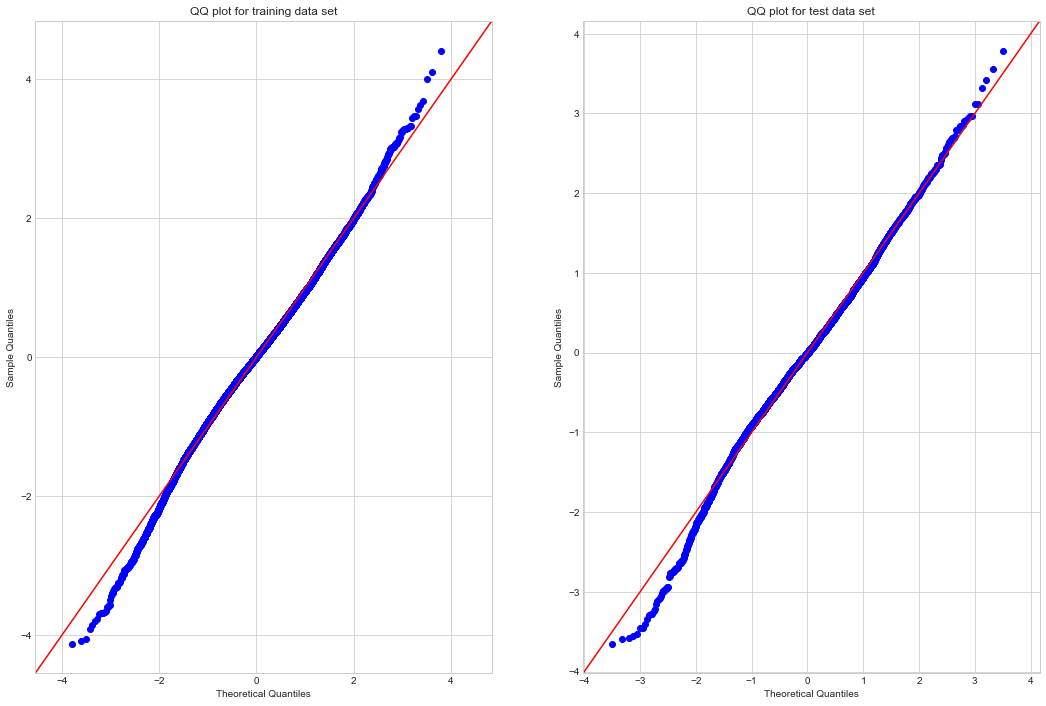

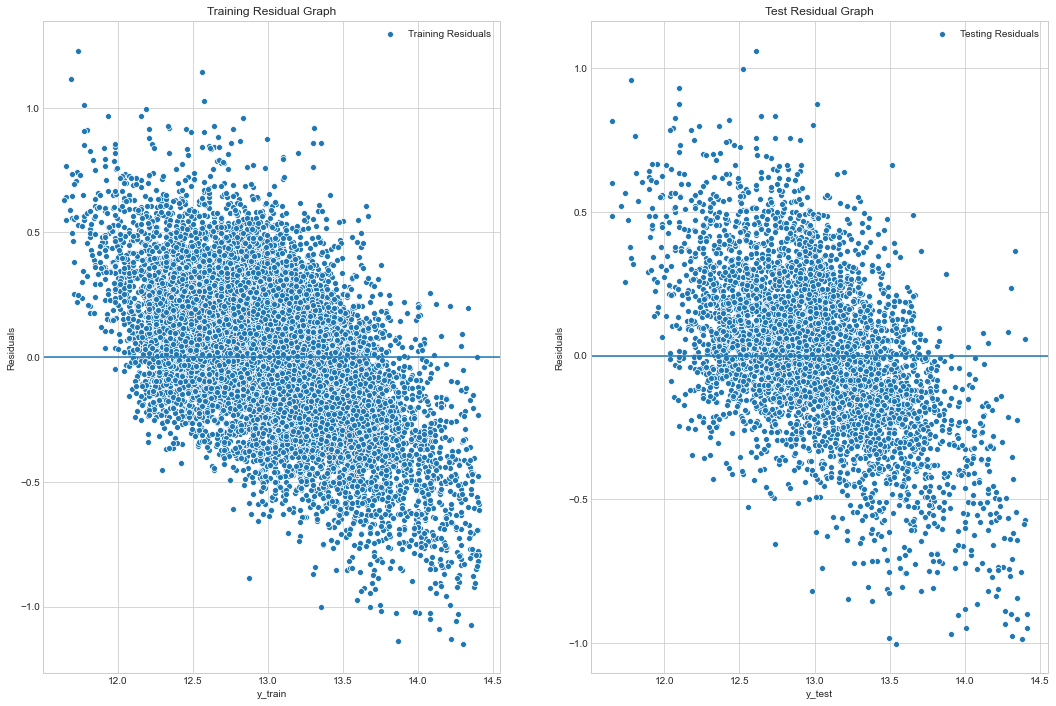

In [19]:
model2.validate_model()

> Observation
    - By dropping columns using VIF and p-values, the r2-value increased.

> Observations
    - r_2_score = 0.636 is an 'okay' value that can be used for interpretation of the model.
    - Not so hot in predicting outcomes
    - Biggest affectors:
        - sqft_living - more space more price
        - Intercept - tells us that houeses are just expensive
        - Latitude - seems like high land value areas are somewhat dependant on latitude
    - Negative affectors:
        - sqft_lot : seems like having a big lot isn't a good thing after all according to this model


### A Quick Save

In [21]:
# saves the current model data
shb.save_data(model2, name='model_2_final')
## Testing out whether it saves the data or not by loading it to another variable.
# model2 = shb.load_data(name='model_2_with_ohe')

# Model #3 - Final

Plan
    1. create new columns
        - age = current year - year built
        - bath_div_bed = number of bath / number of bed
        - grade_x_sqft_living = grade x sqft_living
        - view_x_lot = view x lot
    2. Continuous columns
        - exclude latitude and longitude
    3. Categorical
        - exclude all the categorical columns that will be used to create new columns

In [179]:
model3 = MakeModel(df)

## Scrubing

In [180]:
# waterfront: fillnas with 0s. view:fillnas with mode
model3.imuter('waterfront', option=0)
model3.imuter('view', option='mode')

Number of nulls:  0
None
Number of nulls:  0
None


## Creating new features

In [181]:
model3.data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [182]:
# yr_renovated into booleans
model3.data['yr_renovated'] = model3.data['yr_renovated']>1000
# Create a new column 'age' and drop 'yr_built'
model3.data['age'] = 2019 - model3.data['yr_built']
model3.data.drop(columns='yr_built', axis=1, inplace=True)

In [183]:
# # Bath_div_bed
# model3.data['bath_div_bed'] = model3.data['bathrooms'] / model3.data['bedrooms']
# model3.data['bath_x_bed'] = model3.data['bathrooms'] * model3.data['bedrooms']
model3.data['sqft_living_div_bedrooms'] = model3.data['sqft_living'] / model3.data['bedrooms']

# Grade x sqft_living
model3.data['grade_x_bathrooms'] = model3.data['grade'] * model3.data['bathrooms']

# model3.data['view_x_sqft_lot'] = (model3.data['view']+1.0) * model3.data['sqft_lot']

In [184]:
cat_cols = ['waterfront', 'yr_renovated', 'grade', 'bathrooms']

cont_cols = ['price', 'sqft_living', 'sqft_living_div_bedrooms', 'grade_x_bathrooms','lat', 'long']

model3.set_cols(cat=cat_cols, cont=cont_cols)

['zipcode', 'sqft_lot', 'bedrooms', 'sqft_above', 'view', 'date', 'age', 'sqft_living15', 'floors', 'condition', 'sqft_lot15', 'sqft_basement', 'id']
13 columns have been DELETED!
There are now 10 columns in the data.
Model Information
Shape:	(21597, 10)
Perecent Retained:	100
Dropped columns:	['zipcode', 'sqft_lot', 'bedrooms', 'sqft_above', 'view', 'date', 'age', 'sqft_living15', 'floors', 'condition', 'sqft_lot15', 'sqft_basement', 'id']
Categorical columns:	['waterfront', 'yr_renovated', 'grade', 'bathrooms']
Contiuous columns:	['price', 'sqft_living', 'sqft_living_div_bedrooms', 'grade_x_bathrooms', 'lat', 'long']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None


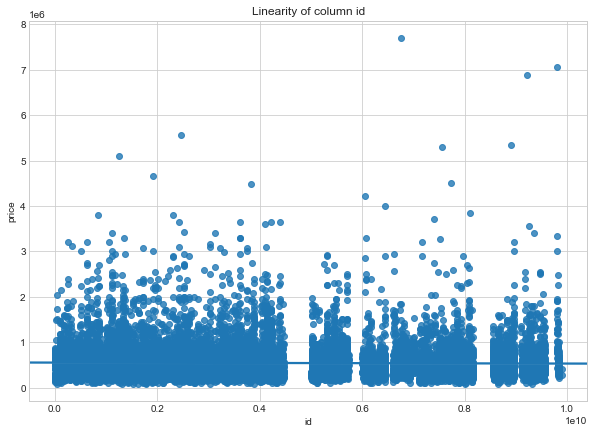


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'id' has been DELETED!
There are now 24 columns in the data.
date


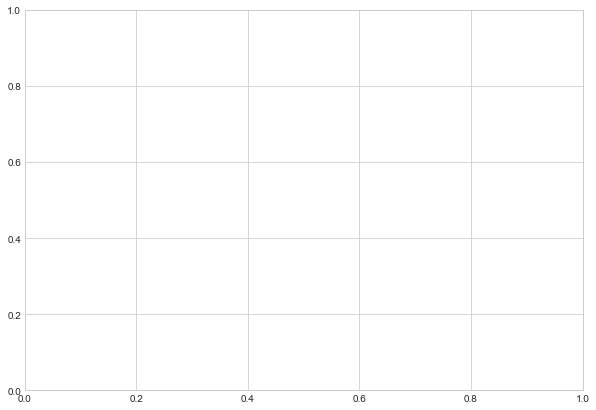

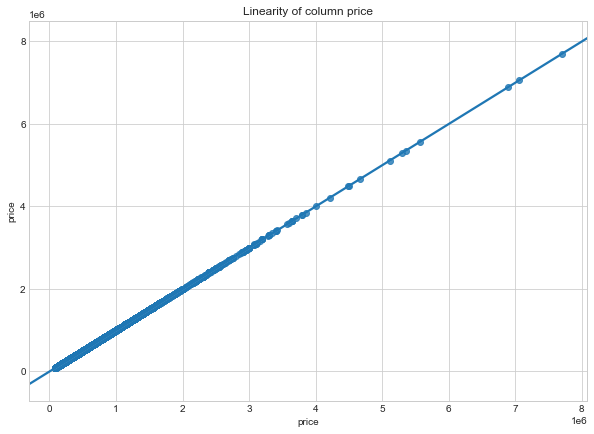


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'price' has been added to continuous columns!'


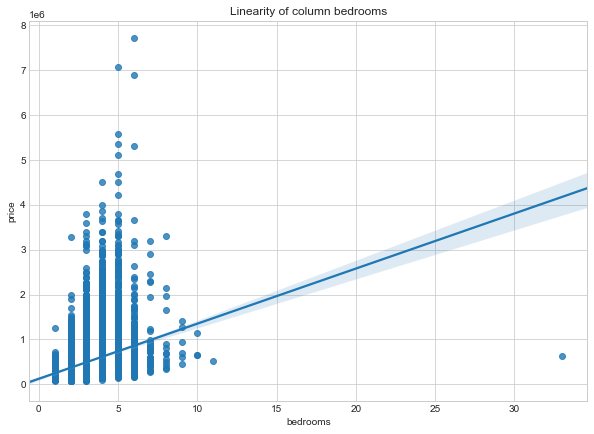


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'bedrooms' has been DELETED!
There are now 24 columns in the data.


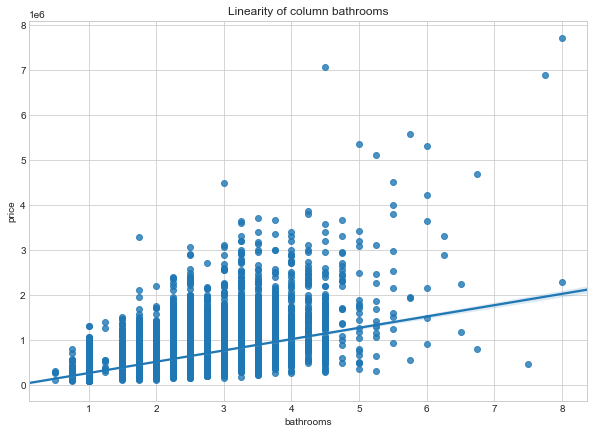


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'bathrooms' has been DELETED!
There are now 24 columns in the data.


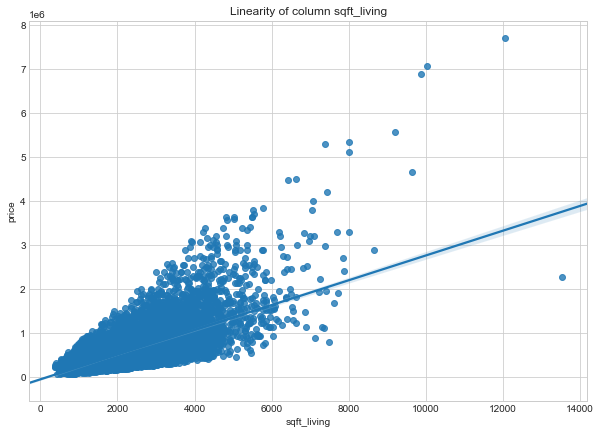


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_living' has been DELETED!
There are now 24 columns in the data.


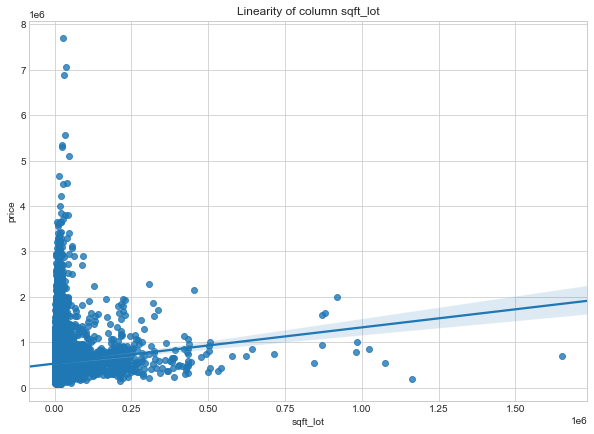


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_lot' has been DELETED!
There are now 24 columns in the data.


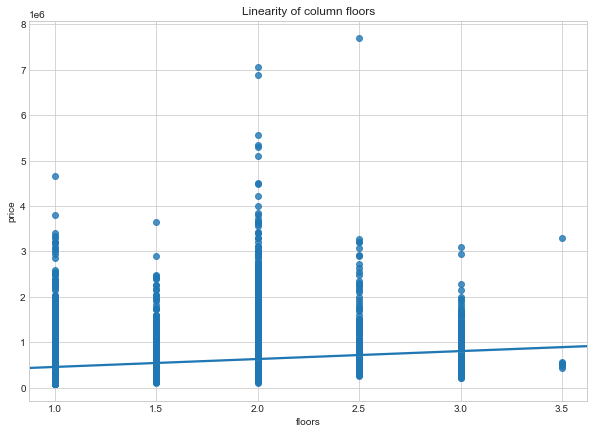


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'floors' has been DELETED!
There are now 24 columns in the data.


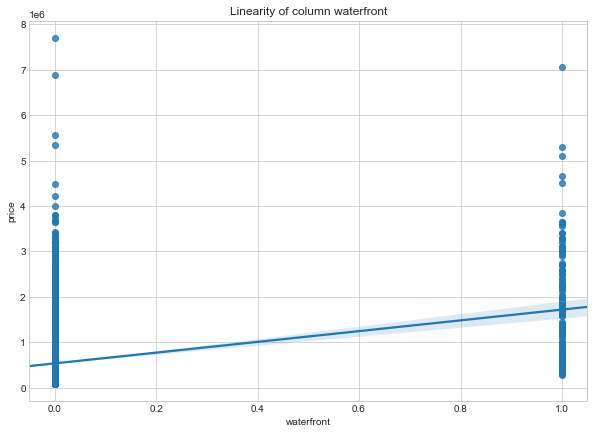


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'waterfront' has been added to categorical columns!'


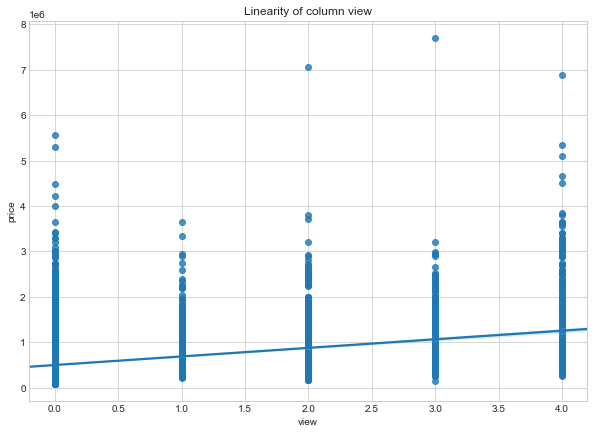


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'view' has been DELETED!
There are now 24 columns in the data.


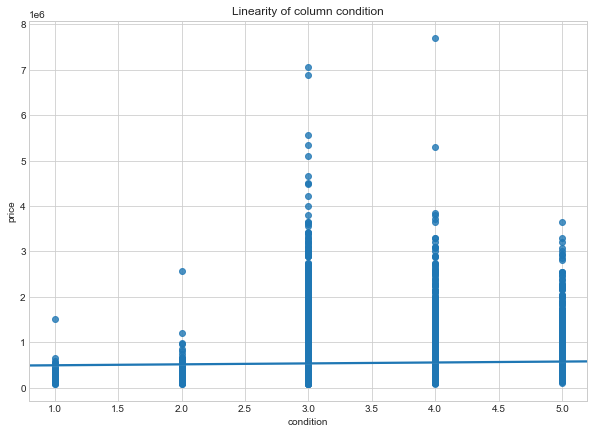


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'condition' has been DELETED!
There are now 24 columns in the data.


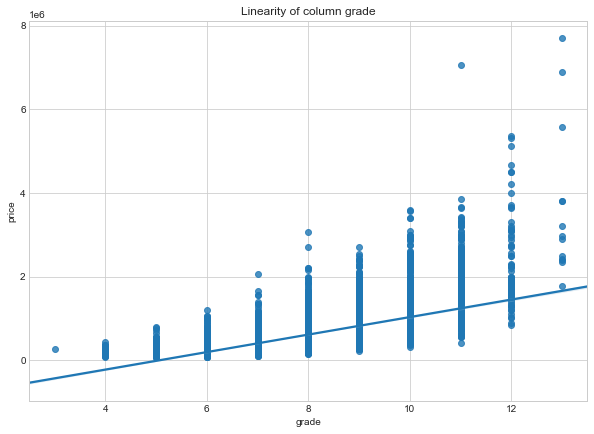


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'grade' has been DELETED!
There are now 24 columns in the data.


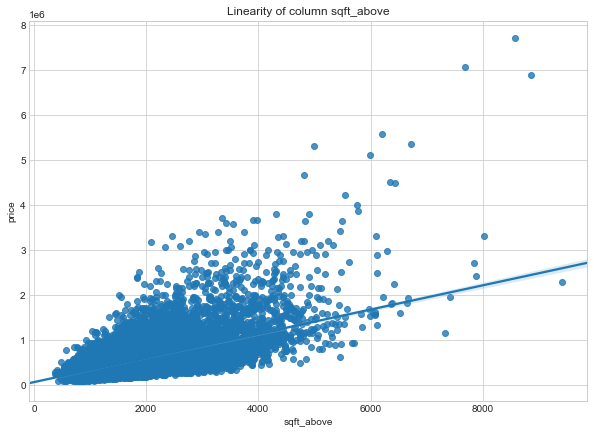


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_above' has been DELETED!
There are now 24 columns in the data.
sqft_basement


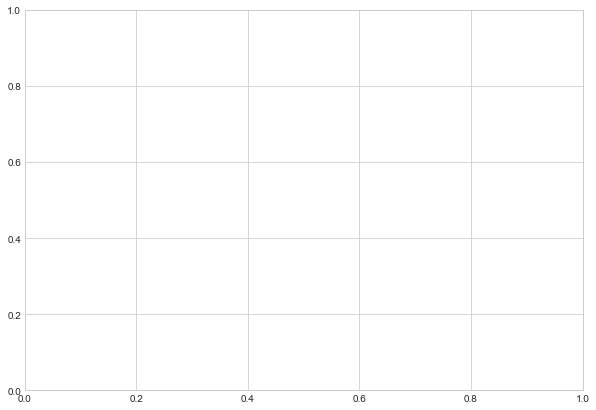

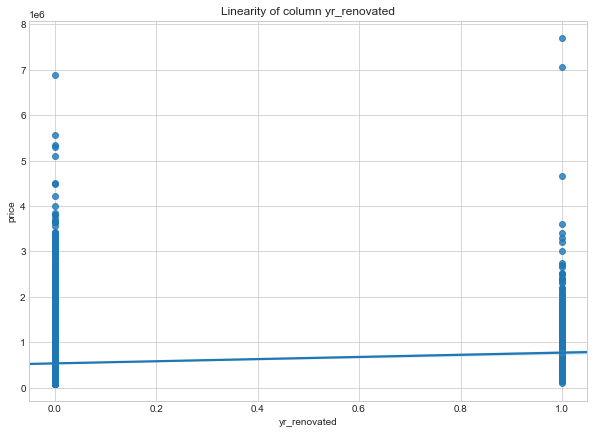


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'yr_renovated' has been added to categorical columns!'


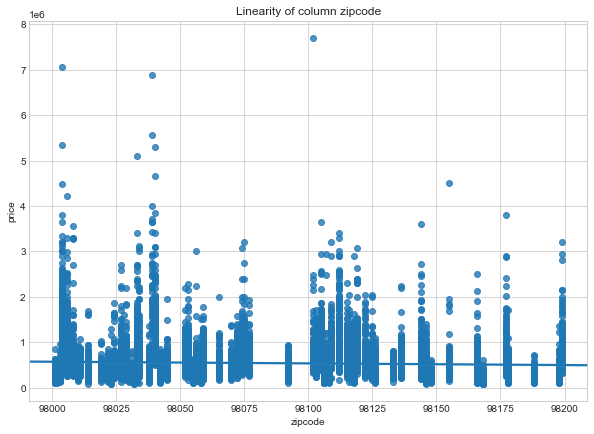


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'zipcode' has been DELETED!
There are now 24 columns in the data.


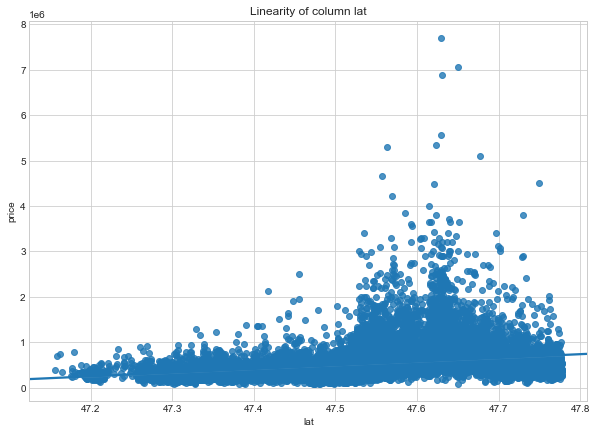


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'lat' has been DELETED!
There are now 24 columns in the data.


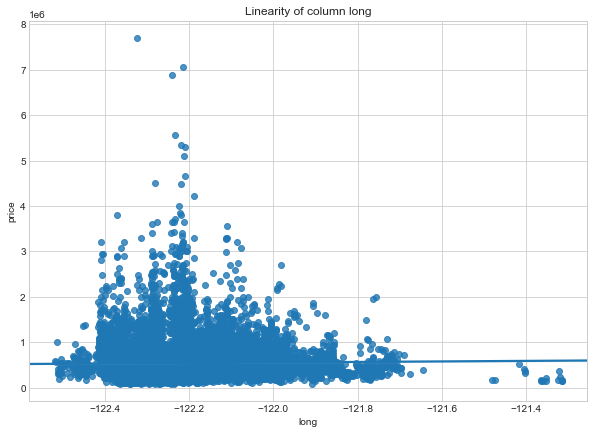


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'long' has been DELETED!
There are now 24 columns in the data.


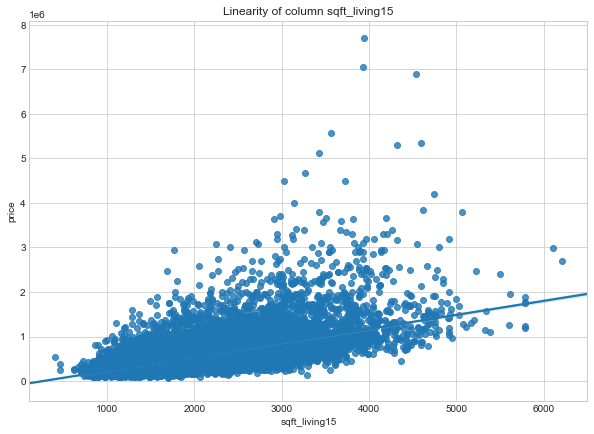


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_living15' has been DELETED!
There are now 24 columns in the data.


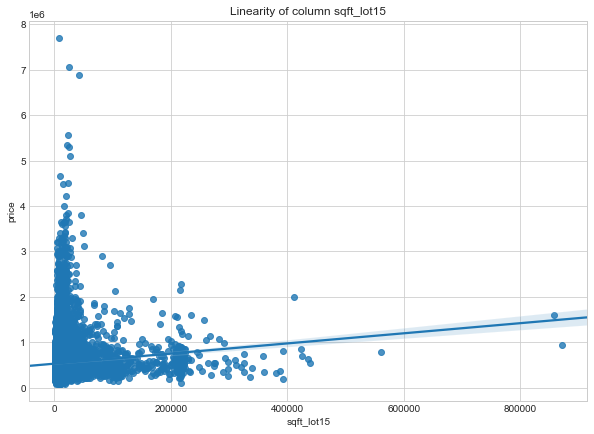


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_lot15' has been DELETED!
There are now 24 columns in the data.


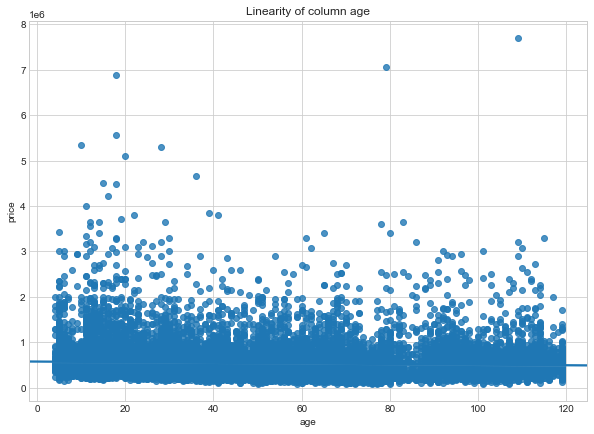


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'age' has been DELETED!
There are now 24 columns in the data.


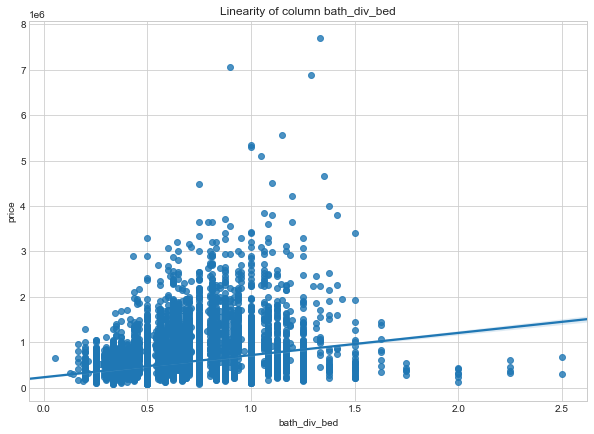


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'bath_div_bed' has been added to continuous columns!'


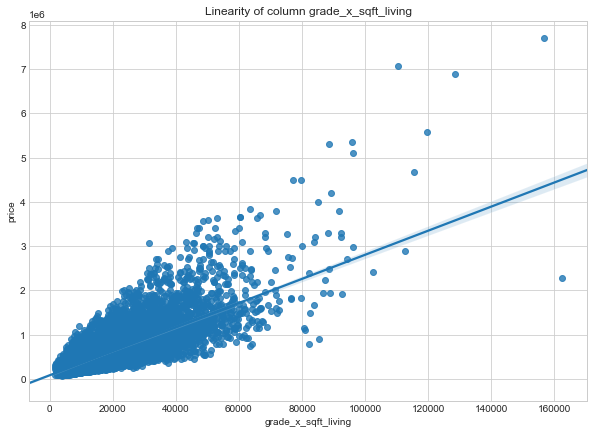


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'grade_x_sqft_living' has been added to continuous columns!'


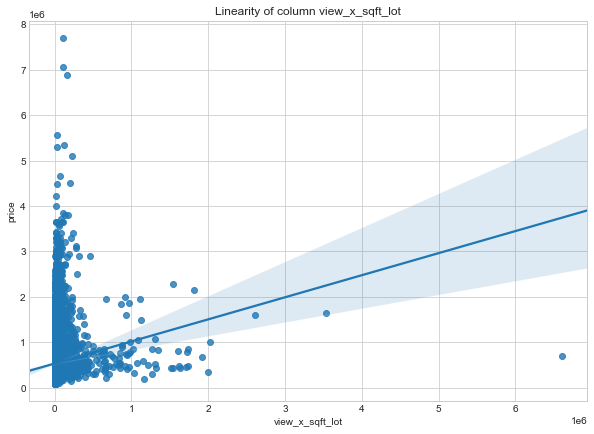


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'view_x_sqft_lot' has been added to continuous columns!'


In [33]:
# Categorize each col into either categorical, continous or just drop
# Also check for linearity between each variable vs. price (target)
# model3.col_classifier()


In [152]:
print(model3)

Model Information
Shape:	(21597, 8)
Perecent Retained:	100
Dropped columns:	['zipcode', 'sqft_lot', 'bedrooms', 'sqft_above', 'view', 'date', 'age', 'sqft_living15', 'floors', 'condition', 'grade_x_sqft_living', 'bath2_x_bed', 'sqft_lot15', 'sqft_basement', 'id']
Categorical columns:	['waterfront', 'yr_renovated', 'grade', 'bathrooms']
Contiuous columns:	['price', 'sqft_living', 'lat', 'long']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


In [153]:
shb.save_data(model3, name='model3_1')
# model3 = shb.load_data(name='model3_1')

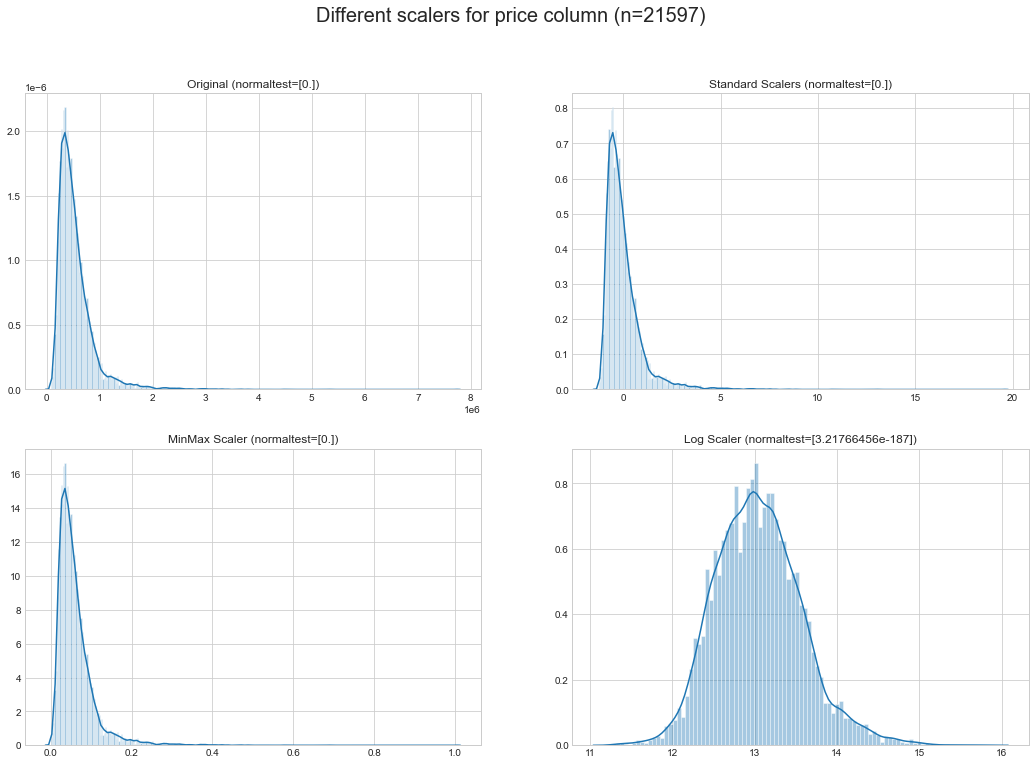

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


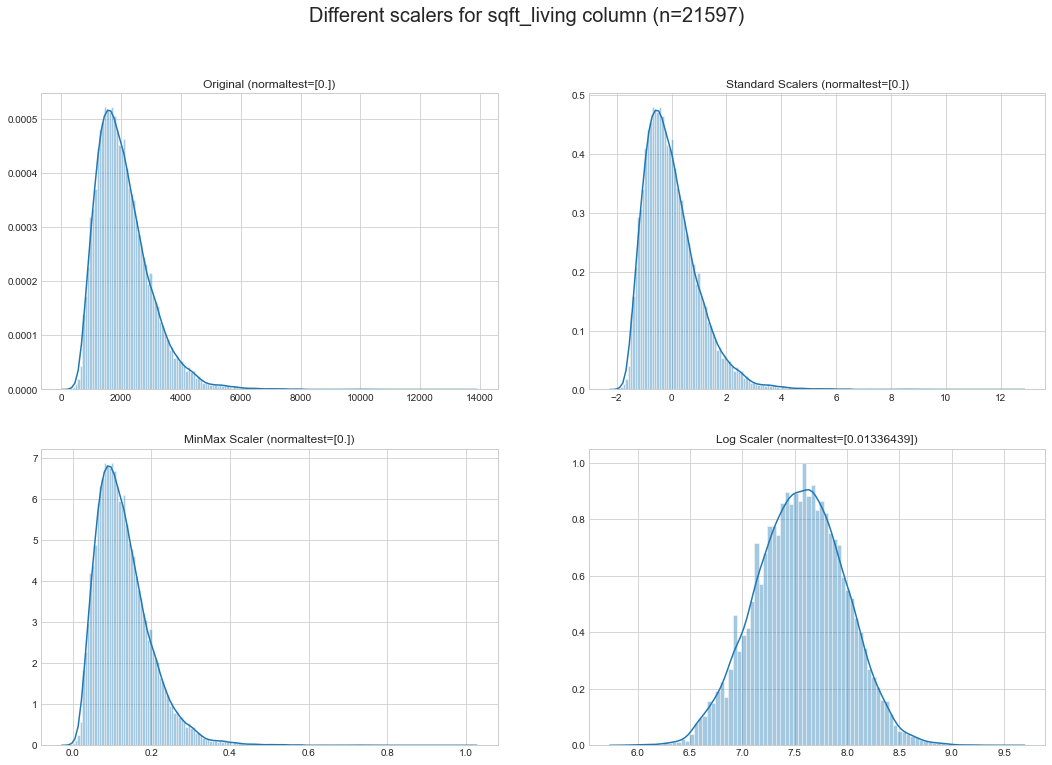

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


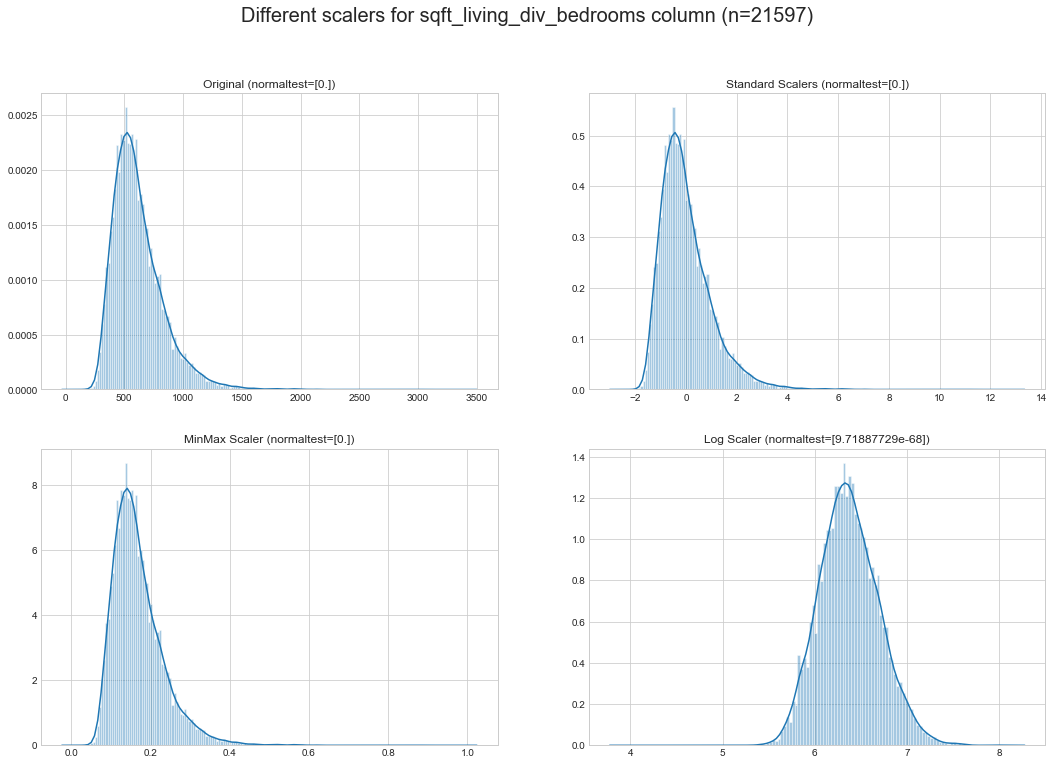

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


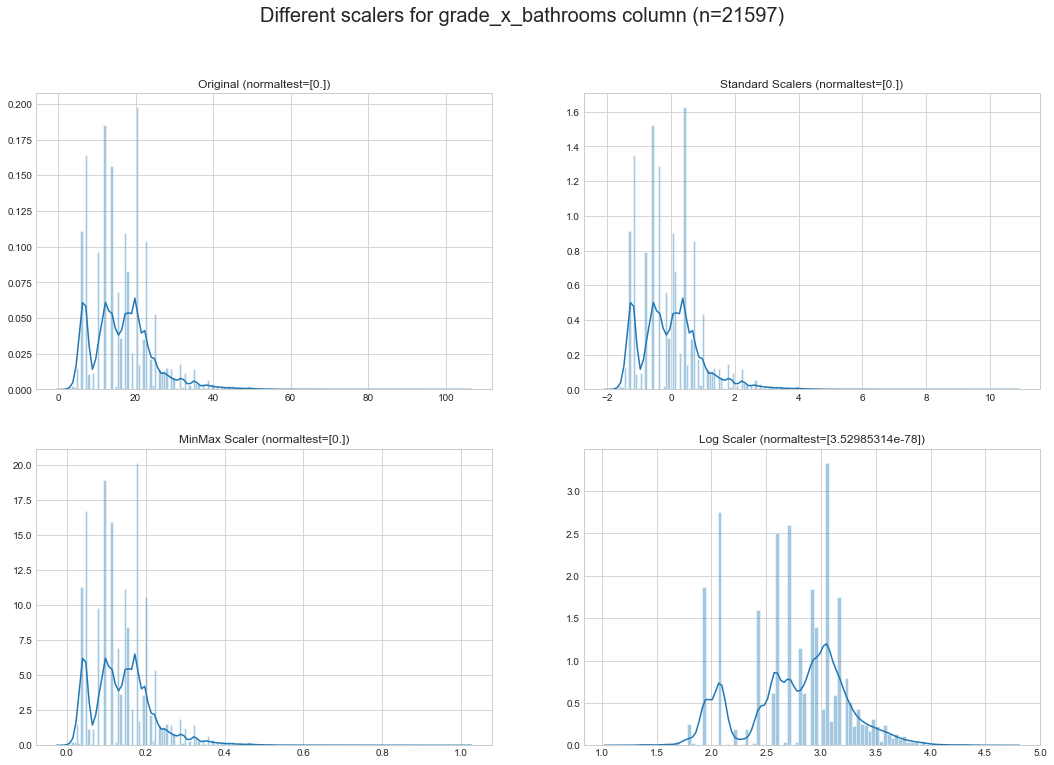

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


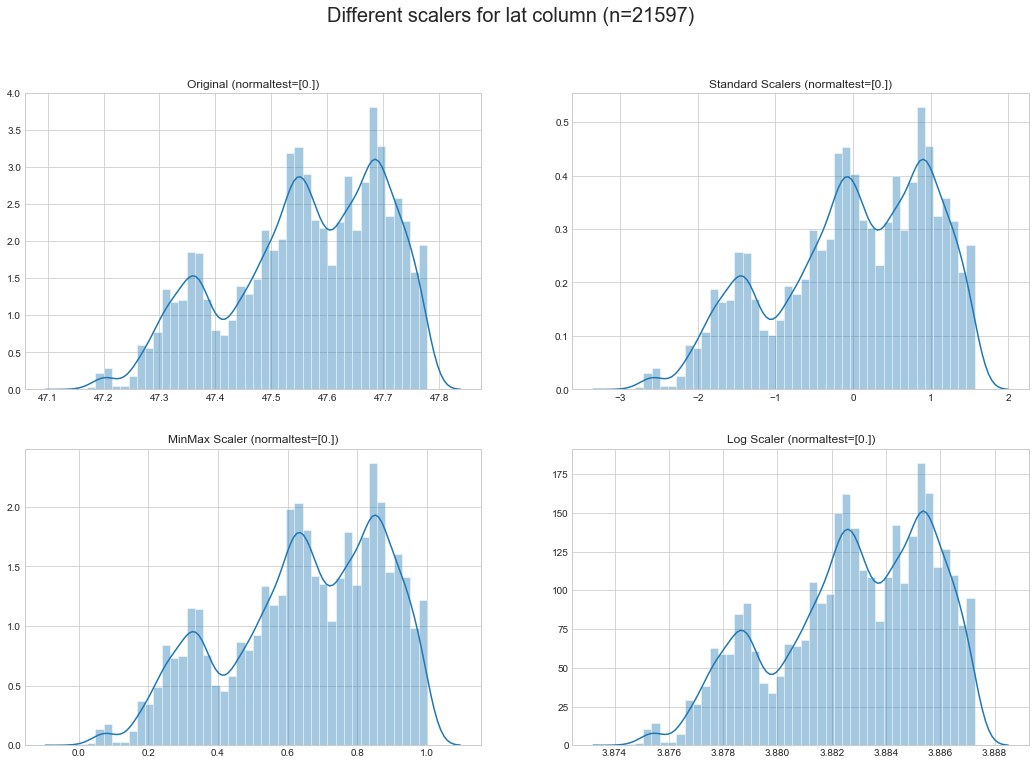

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2
Error occured


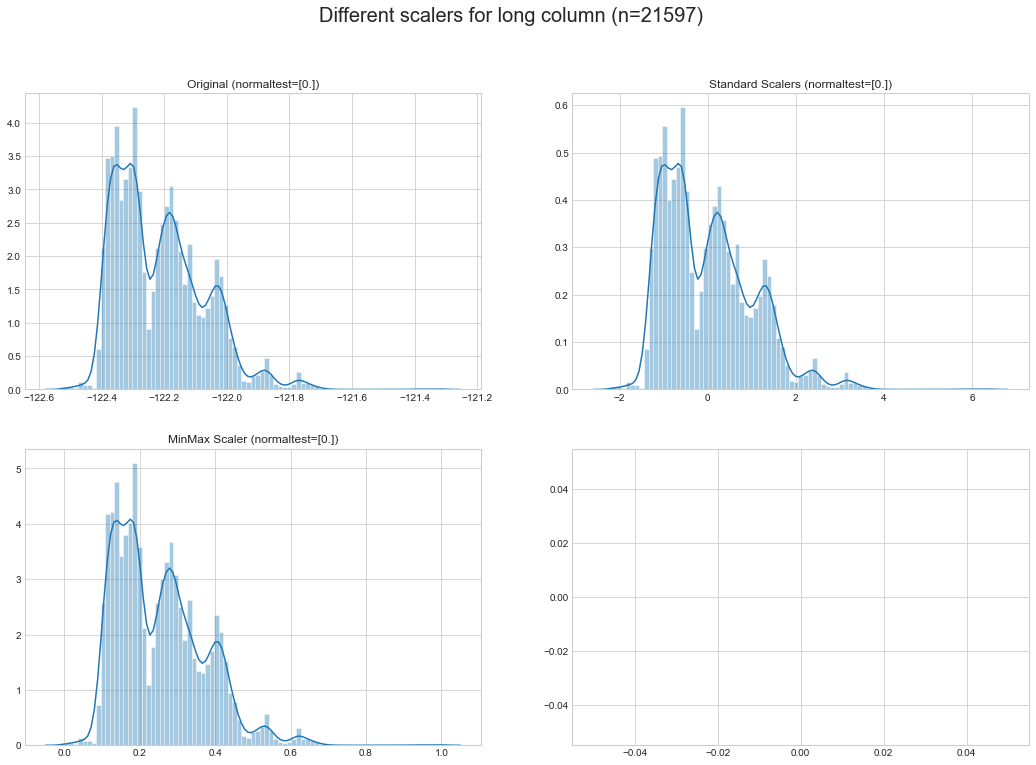

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


In [185]:
for col in model3.cont_cols:
    model3.scaler(col)

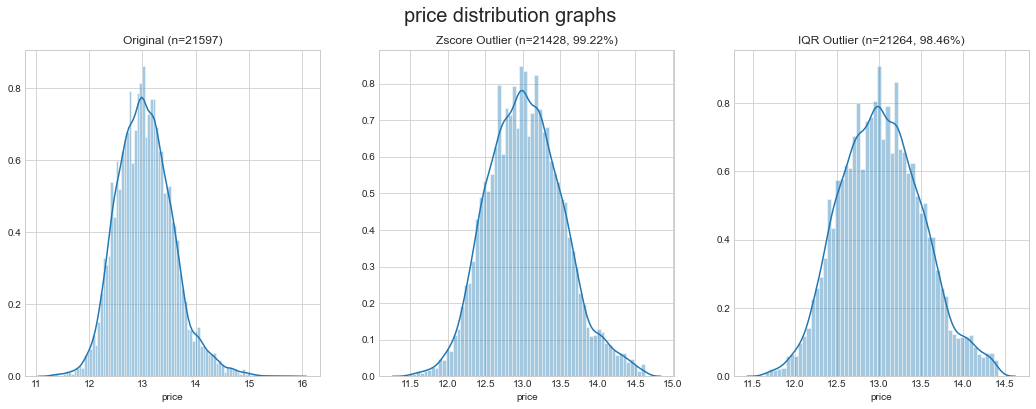

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


333 number of data have been removed by this process.

So far we have 98.458% of original data.


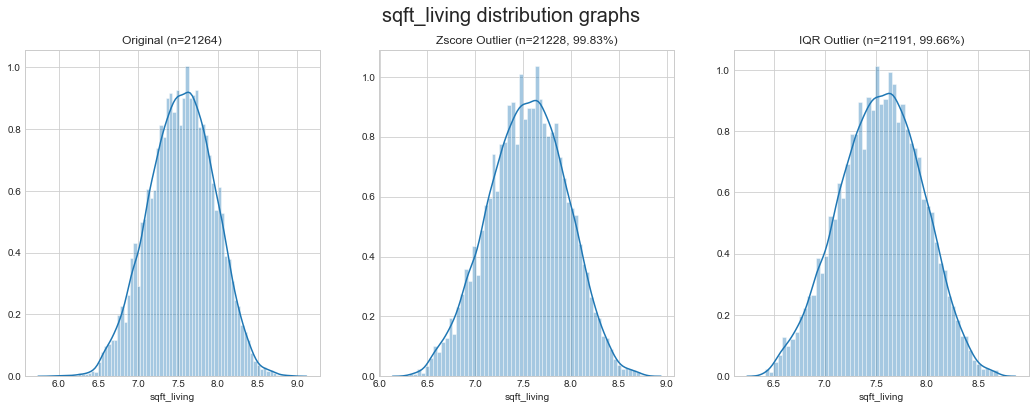

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


73 number of data have been removed by this process.

So far we have 98.12% of original data.


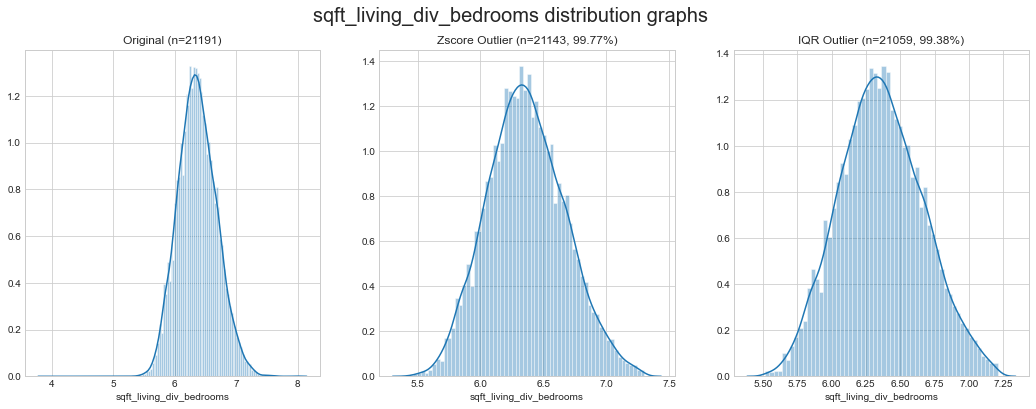

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


132 number of data have been removed by this process.

So far we have 97.509% of original data.


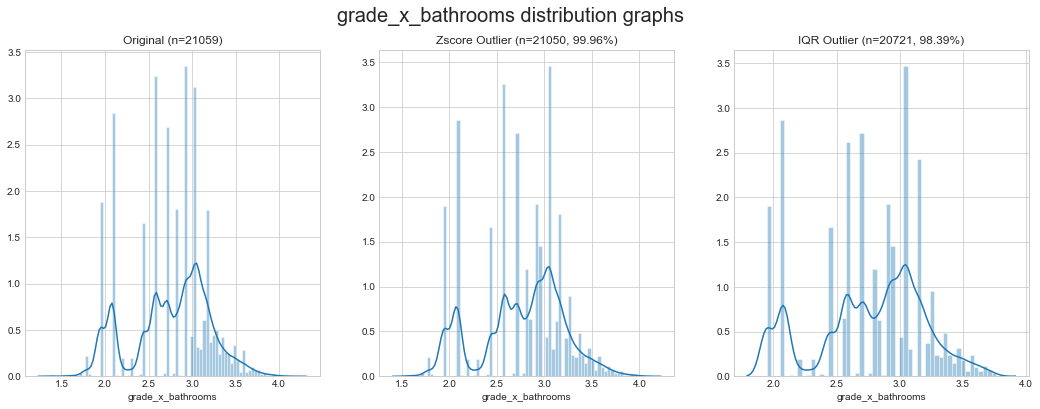

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


338 number of data have been removed by this process.

So far we have 95.944% of original data.


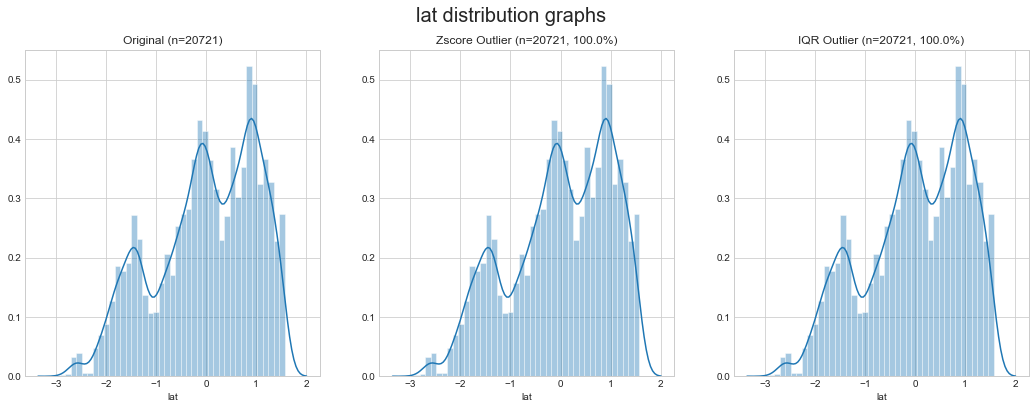

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


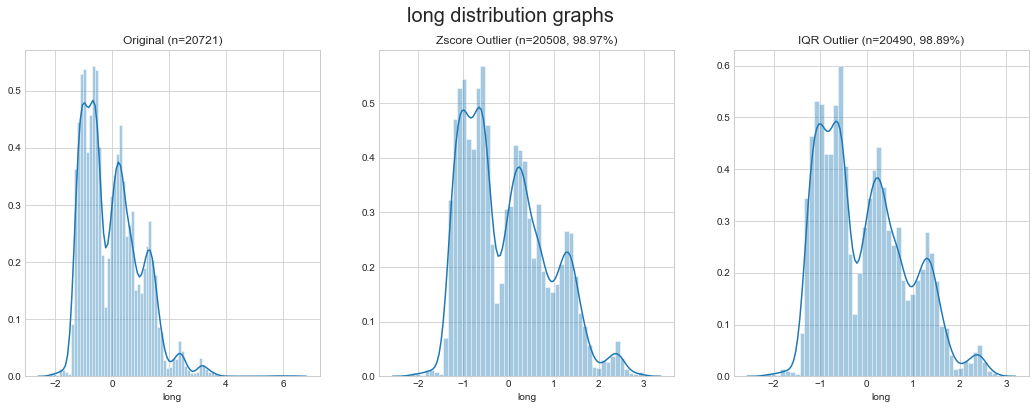

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


In [186]:
for col in model3.cont_cols:
    model3.outlier(col)

In [156]:
# QUick save
shb.save_data(model3, name='model3_scrub_done')

In [110]:
model3 = shb.load_data(name='model3_scrub_done')

## OHE

In [187]:
model3.ohe()

*** OHE TIME ***
Column Name: waterfront
Number of unique values: 2
0.0    0.996284
1.0    0.003716
Name: waterfront, dtype: float64
Would you like to ohe column 'waterfront' (1-yes, 2-no, x-exit): 1
Column waterfront has been one-hot-encoded
1 columns have been added.
Total number of columns: 11
Column Name: yr_renovated
Number of unique values: 2
False    0.966749
True     0.033251
Name: yr_renovated, dtype: float64
Would you like to ohe column 'yr_renovated' (1-yes, 2-no, x-exit): 1
Column yr_renovated has been one-hot-encoded
1 columns have been added.
Total number of columns: 12
Column Name: grade
Number of unique values: 9
7     0.430915
8     0.291154
9     0.123160
6     0.094783
10    0.046619
11    0.010810
5     0.001689
12    0.000820
4     0.000048
Name: grade, dtype: float64
Would you like to ohe column 'grade' (1-yes, 2-no, x-exit): 1
Column grade has been one-hot-encoded
8 columns have been added.
Total number of columns: 20
Column Name: bathrooms
Number of unique value

In [188]:
print(model3)

Model Information
Shape:	(20721, 20)
Perecent Retained:	95.944
Dropped columns:	['zipcode', 'sqft_lot', 'bedrooms', 'sqft_above', 'view', 'date', 'age', 'sqft_living15', 'floors', 'condition', 'sqft_lot15', 'sqft_basement', 'id', 'bathrooms']
Categorical columns:	['waterfront', 'yr_renovated', 'grade']
Contiuous columns:	['price', 'sqft_living', 'sqft_living_div_bedrooms', 'grade_x_bathrooms', 'lat', 'long']
Number of OHE columns:	10
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


In [189]:
model3.fix_col_names()

## Model

In [190]:
model3.split()

Shape of X_train: (15540, 15)
Shape of X_test: (5181, 15)
Shape of y_train: (15540,)
Shape of y_test: (5181,)


In [191]:
model3.regression()

Formula:
price ~ sqft_living + sqft_living_div_bedrooms + grade_x_bathrooms + lat + long + waterfront_10 + yr_renovated_True + grade_5 + grade_6 + grade_7 + grade_8 + grade_9 + grade_10 + grade_11 + grade_12


In [192]:
# model3.drop_ohe_cols()

In [193]:
model3.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2229.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:33:03   Log-Likelihood:                -1569.8
No. Observations:               15540   AIC:                             3172.
Df Residuals:                   15524   BIC:                             3294.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.5595      0.276     34.695      0.000       9.019      10.100
sqft_living                  0.4270      0.011     39.597      0.000       0.406       0.448
sqft_living_div_bedrooms     0.0866      0.011      8.011      0.000       0.065       0.108
grade_x_bathrooms           -0.0153      0.010     -1.577      0.115      -0.034       0.004
lat                          0.2014      0.002     92.425      0.000       0.197       0.206
long                        -0.0297      0.002    -13.011      0.000      -0.034      -0.025
waterfront_10                0.6141      0.034     17.912      0.000       0.547       0.681
yr_renovated_True            0.1509      0.012     12.583      0.000       0.127       0.174
grade_5                     -0.5892      0.273     -2.158      0.031      -1.124      -0.054
grade_6                     -0.4805      0.268     -1.792      0.073      -1.006       0.045
grade_7                     -0.3756      0.268     -1.401      0.161      -0.901       0.150
grade_8                     -0.2200      0.268     -0.820      0.412      -0.746       0.306
grade_9                     -0.0261      0.268     -0.097      0.922      -0.552       0.500
grade_10                     0.1254      0.268      0.467      0.640      -0.401       0.651
grade_11                     0.2436      0.269      0.905      0.365      -0.284       0.771
grade_12                     0.4023      0.280      1.436      0.151      -0.147       0.952
==============================================================================
Omnibus:                      209.416   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.286
Skew:                           0.193   Prob(JB):                     1.67e-60
Kurtosis:                       3.526   Cond. No.                     3.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.07165841267711162	Train R2 = 0.6829233594805119
Test MSE = 0.06970622614146553	Test R2 = 0.6914296276693961


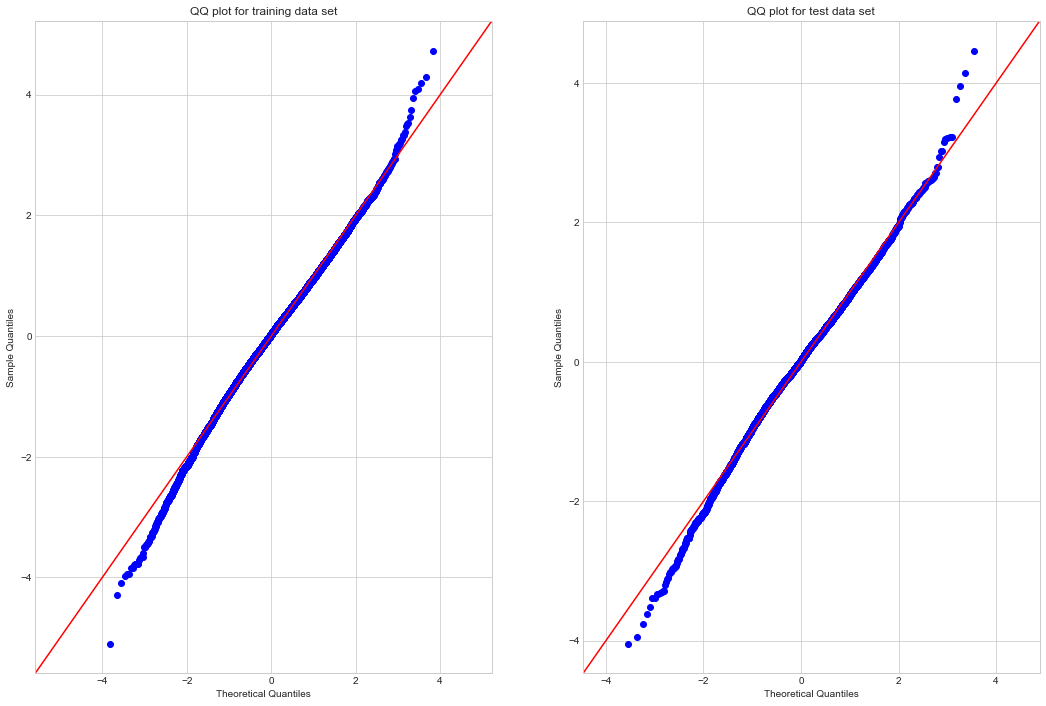

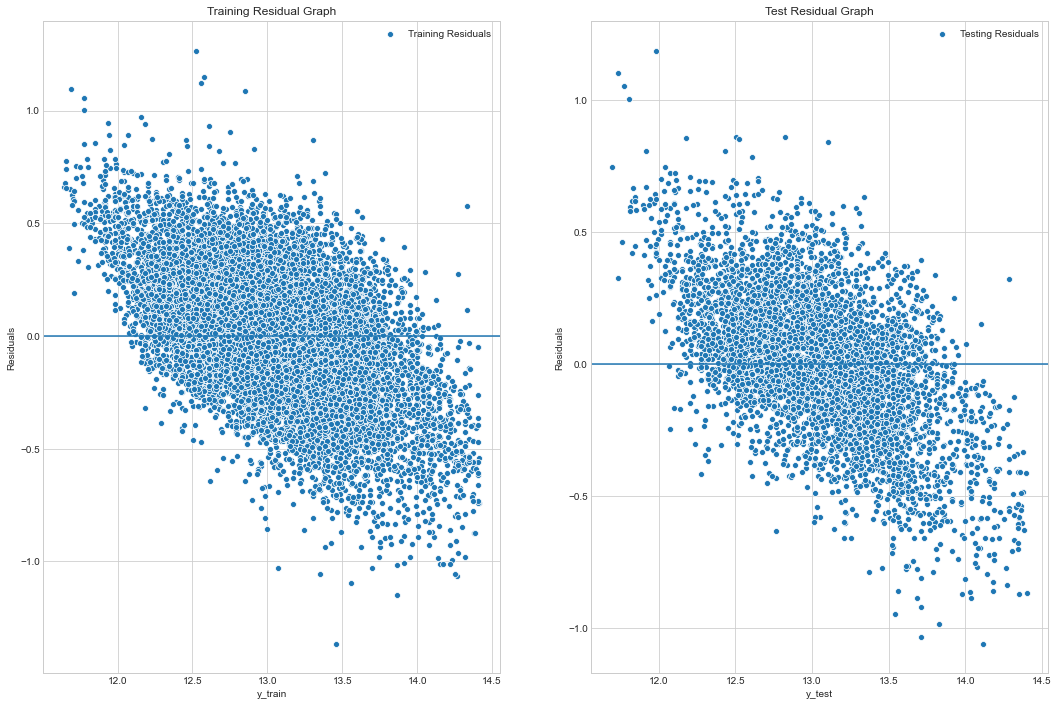

In [194]:
model3.validate_model()

In [195]:
model3.p_value_cut_off()

                   variables       p_value
12                   grade_9  9.223709e-01
13                  grade_10  6.403918e-01
11                   grade_8  4.119714e-01
14                  grade_11  3.653115e-01
10                   grade_7  1.611859e-01
15                  grade_12  1.511282e-01
3          grade_x_bathrooms  1.148301e-01
9                    grade_6  7.308953e-02
8                    grade_5  3.090615e-02
2   sqft_living_div_bedrooms  1.218341e-15
Write cut-off p-value (Usually 0.05, Enter "x" to exit): 0.05
['grade_x_bathrooms', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12']
cont
8 columns have been DELETED!
There are now 12 columns in the data.


In [196]:
print(model3)

Model Information
Shape:	(20721, 12)
Perecent Retained:	95.944
Dropped columns:	['zipcode', 'sqft_lot', 'bedrooms', 'sqft_above', 'view', 'date', 'age', 'sqft_living15', 'floors', 'condition', 'sqft_lot15', 'sqft_basement', 'id', 'bathrooms', 'grade_x_bathrooms']
Categorical columns:	['waterfront', 'yr_renovated', 'grade']
Contiuous columns:	['price', 'sqft_living', 'sqft_living_div_bedrooms', 'lat', 'long']
Number of OHE columns:	3
Train MSE = 0.07165841267711162	Train R2 = 0.6829233594805119
Test MSE = 0.06970622614146553	Test R2 = 0.6914296276693961
Model Information Completed


In [198]:
model3.multicolinearity()


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: x


In [199]:
model3.split()
model3.regression()
model3.model.summary()

Shape of X_train: (15540, 7)
Shape of X_test: (5181, 7)
Shape of y_train: (15540,)
Shape of y_test: (5181,)
Formula:
price ~ sqft_living + sqft_living_div_bedrooms + lat + long + waterfront_10 + yr_renovated_True + grade_5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     3691.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:34:01   Log-Likelihood:                -2882.5
No. Observations:               15540   AIC:                             5781.
Df Residuals:                   15532   BIC:                             5842.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    6.9484      0.053    130.963      0.000       6.844       7.052
sqft_living                  0.6365      0.009     71.956      0.000       0.619       0.654
sqft_living_div_bedrooms     0.2003      0.011     17.506      0.000       0.178       0.223
lat                          0.2142      0.002     91.058      0.000       0.210       0.219
long                        -0.0228      0.002     -9.229      0.000      -0.028      -0.018
waterfront_10                0.6503      0.037     17.444      0.000       0.577       0.723
yr_renovated_True            0.1312      0.013     10.066      0.000       0.106       0.157
grade_5                     -0.2272      0.056     -4.044      0.000      -0.337      -0.117
==============================================================================
Omnibus:                      109.172   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.555
Skew:                           0.133   Prob(JB):                     9.98e-30
Kurtosis:                       3.368   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE = 0.08484784663632143	Train R2 = 0.6245622926650354
Test MSE = 0.08378267249029991	Test R2 = 0.6291170548708556


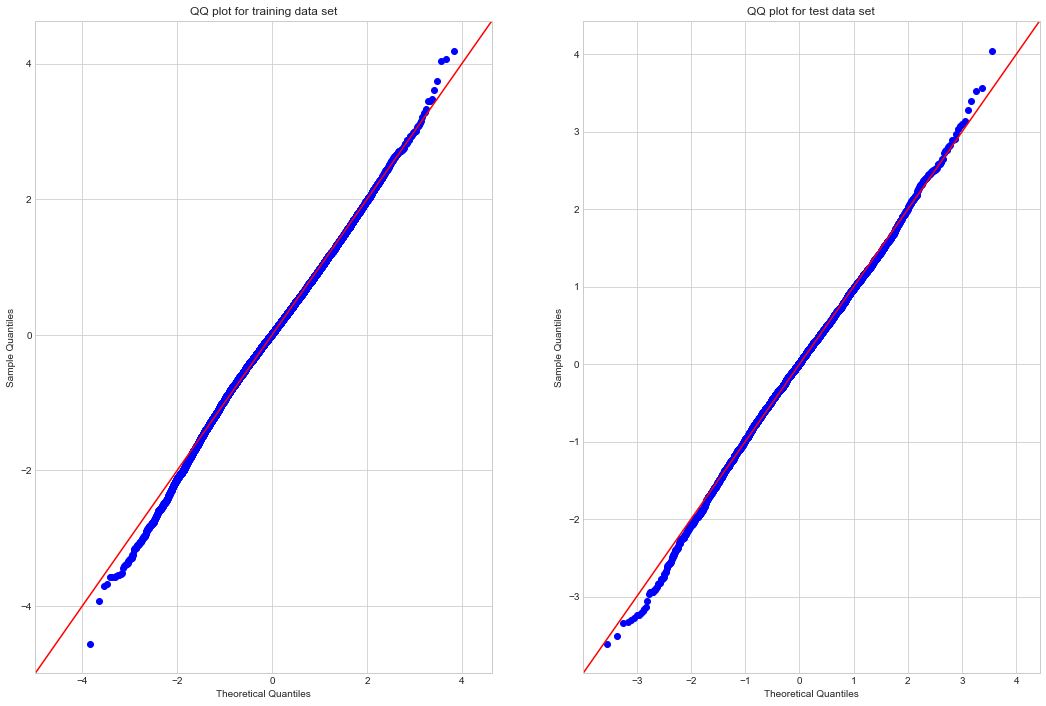

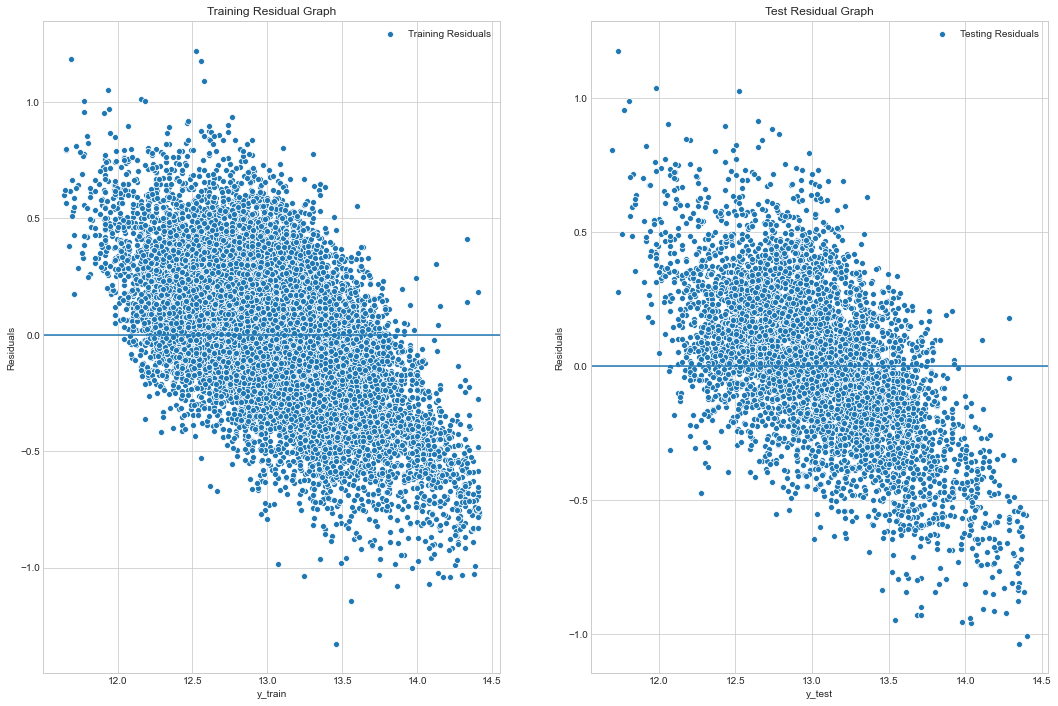

In [200]:
model3.validate_model()

In [201]:
shb.save_data(model3, name='model_3_final')

## Interpret

In [202]:
print(model3)

Model Information
Shape:	(20721, 12)
Perecent Retained:	95.944
Dropped columns:	['zipcode', 'sqft_lot', 'bedrooms', 'sqft_above', 'view', 'date', 'age', 'sqft_living15', 'floors', 'condition', 'sqft_lot15', 'sqft_basement', 'id', 'bathrooms', 'grade_x_bathrooms']
Categorical columns:	['waterfront', 'yr_renovated', 'grade']
Contiuous columns:	['price', 'sqft_living', 'sqft_living_div_bedrooms', 'lat', 'long']
Number of OHE columns:	3
Train MSE = 0.08484784663632143	Train R2 = 0.6245622926650354
Test MSE = 0.08378267249029991	Test R2 = 0.6291170548708556
Model Information Completed


> Obsevation
    - QQ-plots show normal distribution of residuals
    - Residual graphs show Homoscedasticity but biased
        - over estimates low priced houses and vice versa
    - R2 values are around 0.625 and 0.624 for train and test data, respectively
        - this model can be used to interpret rather than predict
        - to raise R2 value, we could add in more variables
        - similar r2 and mse values suggest that the model is not overfitting nor underfitting


# Conclusion

According to the final model, the following factors are the biggest + affectors in price:

    1. living area = more space means higher price
    2. waterfront = having waterfront increases the value of the price
    3. living area / bedroom numbers = more space per bedroom means higher price
    4. higher latitude = usually results in higher price

According to the final model, the following factors are the biggest negative affectors in price:

    1. longitude = higher longitude results in lower price
    2. grade 5 = having mid-rank grade lowers the price of the house

# Further Studies